In [ ]:
!apt-get update -y -qq && apt-get install -y -qq cmake libopenmpi-dev python3-dev zlib1g-dev libgl1-mesa-glx swig
!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package libgl1-mesa-glx:amd64.
(Reading database ... 123629 files and directories currently installed.)
Preparing to unpack .../libgl1-mesa-glx_23.0.4-0ubuntu1~22.04.1_amd64.deb ...
Unpacking libgl1-mesa-glx:amd64 (23.0.4-0ubuntu1~22.04.1) ...
Selecting previously unselected package swig4.0.
Preparing to unpack .../swig4.0_4.0.2-1ubuntu1_amd64.deb ...
Unpacking swig4.0 (4.0.2-1ubuntu1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_4.0.2-1ubuntu1_all.deb ...
Unpacking swig (4.0.2-1ubuntu1) ...
Setting up libgl1-mesa-glx:amd64 (23.0.4-0ubuntu1~22.04.1) ...
Setting up swig4.0 (4.0.2-1ubuntu1) ...
Setting up swig (4.0.2-1ubuntu1) ...
Processing triggers for man-db (2.10.2-1) ...
  Cloning https://github.com/AI4Finance-Foundation/FinRL.git t

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime
# import yfinance as yf
# from .screener.screener import Screener

%matplotlib inline
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from stable_baselines3.common.logger import configure
from finrl.meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from pprint import pprint

import sys
sys.path.append("../FinRL")

import itertools

from finrl import config
from finrl import config_tickers
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)
check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])


/usr/local/lib/python3.10/dist-packages/pandas_datareader/compat/__init__.py:11: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  PANDAS_VERSION = LooseVersion(pd.__version__)
/usr/local/lib/python3.10/dist-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [ ]:
TRAIN_START_DATE = '2009-01-01'
TRAIN_END_DATE = '2023-09-01'

TRADE_START_DATE = '2023-09-01'
TRADE_END_DATE = '2024-09-30'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
CUSTOM_TICKER=["AAPL","AMGN","AMZN","AXP","BA","CAT","CSCO","CVX","DIS","GOOG","GS","HD","HON","IBM","INTC","JNJ","KO","MSFT","NKE","NVDA","PG","QCOM","TRV","UNH","VZ","WMT"]

In [ ]:
all_data = []
for ticker in CUSTOM_TICKER:
    d_f = YahooDownloader(start_date=TRAIN_START_DATE,
                         end_date=TRADE_END_DATE,
                         ticker_list=[ticker]).fetch_data()
    all_data.append(d_f)
    if len(d_f.columns) != 8:
        print(f"Data for {ticker} has a column length mismatch or is incomplete")
df = pd.concat(all_data, ignore_index=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Shape of DataFrame:  (3961, 8)



[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (3961, 8)
Shape of DataFrame:  (3961, 8)


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (3961, 8)


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (3961, 8)


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (3961, 8)


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (3961, 8)


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (3961, 8)


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (3961, 8)


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (3961, 8)


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (3961, 8)


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (3961, 8)


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (3961, 8)


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (3961, 8)


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (3961, 8)


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (3961, 8)


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (3961, 8)


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (3961, 8)


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (3961, 8)


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (3961, 8)


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (3961, 8)


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (3961, 8)


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (3961, 8)


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (3961, 8)


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (3961, 8)


[*********************100%***********************]  1 of 1 completed

Shape of DataFrame:  (3961, 8)


In [ ]:

import torch
import torch.nn as nn
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Assuming `processed_full` is already created from your previous code

# Parameters for LSTM
window_size = 60  # Number of days to look back for each prediction
hidden_size = 50  # Number of features in hidden state
num_layers = 2    # Number of stacked LSTM layers
num_epochs = 50   # Number of training epochs
learning_rate = 0.001

# LSTM Model Definition
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=hidden_size, num_layers=num_layers):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Last time-step's output
        return out

# Initialize model, loss function and optimizer
lstm_model = LSTMModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=learning_rate)

# To store all predictions
df['lstm_prediction'] = 0.0

# Loop over each ticker in CUSTOM_TICKER to train and predict individually
for ticker in CUSTOM_TICKER:
    # Extract data for the specific ticker
    ticker_data = df[df['tic'] == ticker].copy()
    prices = ticker_data['close'].values

    # Normalize the data
    scaler = MinMaxScaler()
    prices_normalized = scaler.fit_transform(prices.reshape(-1, 1))

    # Prepare data sequences for LSTM
    X_train, y_train = [], []
    for i in range(len(prices_normalized) - window_size):
        X_train.append(prices_normalized[i:i + window_size])
        y_train.append(prices_normalized[i + window_size])

    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

    # Reshape y tensor for training
    y_train_tensor = y_train_tensor.view(-1, 1)

    # Train the model
    for epoch in range(num_epochs):
        lstm_model.train()
        optimizer.zero_grad()
        output = lstm_model(X_train_tensor)
        loss = criterion(output, y_train_tensor)
        loss.backward()
        optimizer.step()

    # Making predictions
    lstm_model.eval()
    predictions = []
    for i in range(len(prices_normalized) - window_size):
        with torch.no_grad():
            input_seq = torch.tensor(prices_normalized[i:i + window_size], dtype=torch.float32).unsqueeze(0)
            prediction = lstm_model(input_seq)
            predictions.append(prediction.item())

    # Rescale predictions back to original price scale
    predictions_rescaled = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

    # Insert predictions into DataFrame as a new feature
    df.loc[df['tic'] == ticker, 'lstm_prediction'] = np.concatenate(
        ([0] * window_size, predictions_rescaled.flatten())
    )

# Check output
print(df[['date', 'tic', 'close', 'lstm_prediction']].tail(52))


<ipython-input-6-861c072d8cad>:52: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  X_train_tensor = torch.tensor(X_train, dtype=torch.float32)


In [ ]:

df.sort_values(['date','tic'],ignore_index=True).head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date       open       high        low      close     volume   tic  \
0  2009-01-02   2.733997   3.241071   3.251429   3.067143  746015200  AAPL   
1  2009-01-02  41.484409  58.990002  59.080002  58.590000    6547900  AMGN   
2  2009-01-02   2.718000   2.718000   2.726500   2.567500  145928000  AMZN   
3  2009-01-02  15.014072  19.330000  19.520000  18.570000   10955700   AXP   
4  2009-01-02  33.941101  45.250000  45.560001  42.799999    7010200    BA   

   day  lstm_prediction  
0    4              0.0  
1    4              0.0  
2    4              0.0  
3    4              0.0  
4    4              0.0

In [ ]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = INDICATORS,
                    use_vix=True,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Successfully added technical indicators


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (3960, 8)
Successfully added vix
Successfully added turbulence index


In [ ]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Drop rows where 'lstm_prediction' column contains 0.0
processed_full = processed_full[processed_full['lstm_prediction'] != 0.0]

# Optional: Reset the index for better readability after dropping rows
processed_full = processed_full.reset_index(drop=True)

# Display the top 10 rows after filtering
# print(processed_full.head(10))


In [ ]:
processed_full.sort_values(['date','tic'],ignore_index=True).head(10)

date   tic       open       high        low      close       volume  \
0  2009-02-17  AAPL   2.847875   3.376071   3.465714   3.459643  678238400.0   
1  2009-02-17  AMGN  39.670036  56.410000  57.360001  56.900002    8469900.0   
2  2009-02-17  AMZN   3.083500   3.083500   3.132500   3.083500  142522000.0   
3  2009-02-17   AXP  10.936496  13.960000  15.400000  14.930000   29448200.0   
4  2009-02-17    BA  29.116096  38.430000  39.740002  39.490002    6949100.0   
5  2009-02-17   CAT  19.109587  28.980000  30.500000  30.299999   22207000.0   
6  2009-02-17  CSCO  10.202849  15.290000  15.760000  15.680000   47981100.0   
7  2009-02-17   CVX  35.477531  66.180000  67.930000  67.230003   18834600.0   
8  2009-02-17   DIS  15.241792  17.840000  18.110001  18.070000   21996100.0   
9  2009-02-17  GOOG   8.513602   8.534511   8.644847   8.630401  228067661.0   

   day  lstm_prediction      macd    boll_ub    boll_lb     rsi_30  \
0  1.0        67.684237  0.076754   3.701521   2.892979  57.028456   
1  1.0       161.945511  0.350119  59.215077  52.527924  48.776295   
2  1.0        41.951985  0.129123   3.540755   2.192994  59.631196   
3  1.0        33.503319 -0.395338  18.143428  14.890572  38.397239   
4  1.0        79.157030 -0.608041  43.903323  39.230677  41.131243   
5  1.0        62.466995 -1.663679  39.089053  26.991947  28.519684   
6  1.0        17.821932 -0.025144  17.182195  14.730805  46.662030   
7  1.0        76.352487 -0.450052  74.912001  67.264000  40.021286   
8  1.0        25.990548 -0.711121  22.467911  17.696089  34.544326   
9  1.0        11.032678  0.224208   9.614625   7.211506  56.233328   

       cci_30      dx_30  close_30_sma  close_60_sma        vix  turbulence  
0   64.189315  14.227091      3.262905      3.256590  48.139999         0.0  
1    1.217107   0.414428     56.551667     56.617420  48.139999         0.0  
2   67.132399  29.647982      2.801283      2.793742  48.139999         0.0  
3 -150.133328  18.155572     17.415333     17.452581  48.139999         0.0  
4 -167.284676  22.874524     42.338333     42.353226  48.139999         0.0  
5  -88.206177  51.872142     36.347334     36.623549  48.139999         0.0  
6  -90.074580  16.584921     16.202000     16.208710  48.139999         0.0  
7 -198.155308  27.381904     71.826000     71.903549  48.139999         0.0  
8 -155.998163  30.308438     20.876333     20.937097  48.139999         0.0  
9   41.235350   7.472473      8.239475      8.221627  48.139999         0.0

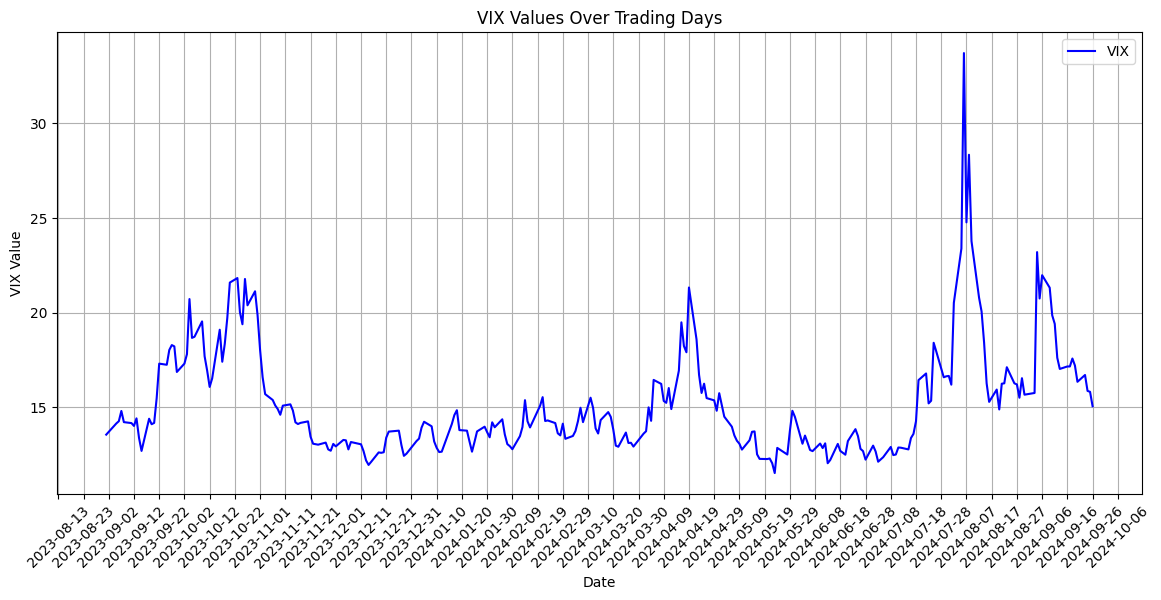

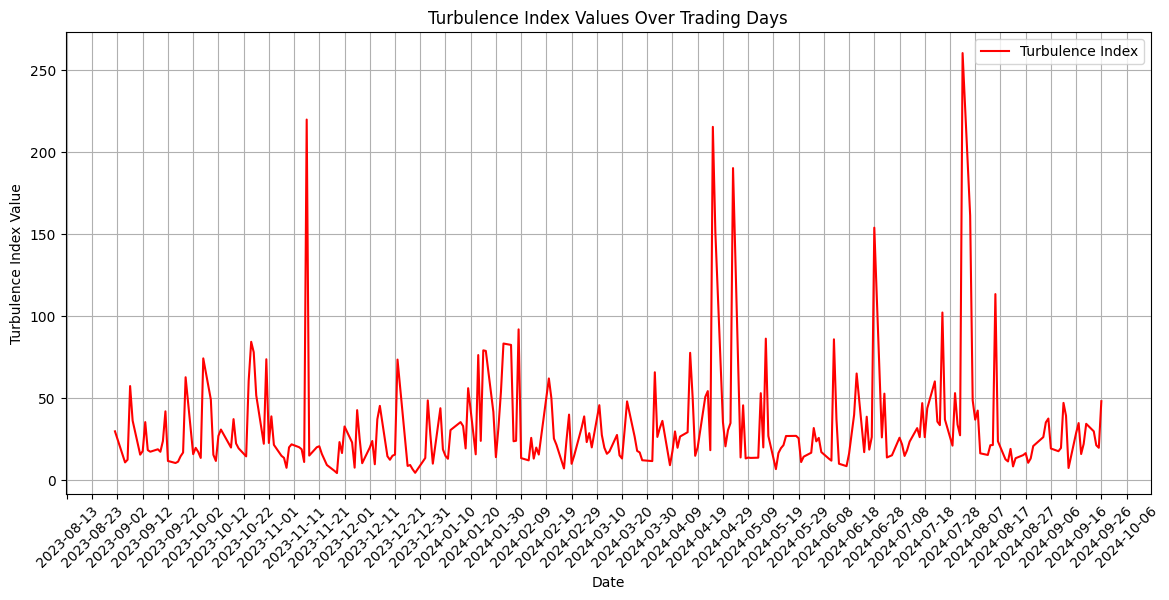

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

trade_data = processed_full[(processed_full['date'] >= TRADE_START_DATE) & (processed_full['date'] <= TRADE_END_DATE)]

# Convert the 'date' column to datetime format if it's not already
trade_data['date'] = pd.to_datetime(trade_data['date'])

# Plot VIX
plt.figure(figsize=(14, 6))
plt.plot(trade_data['date'], trade_data['vix'], label='VIX', color='blue')
plt.xlabel('Date')
plt.ylabel('VIX Value')
plt.title('VIX Values Over Trading Days')
plt.legend()
plt.grid()

# Set x-axis to display dates daily with formatting
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Adjust interval as needed
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.show()

# Plot Turbulence Index
plt.figure(figsize=(14, 6))
plt.plot(trade_data['date'], trade_data['turbulence'], label='Turbulence Index', color='red')
plt.xlabel('Date')
plt.ylabel('Turbulence Index Value')
plt.title('Turbulence Index Values Over Trading Days')
plt.legend()
plt.grid()

# Set x-axis to display dates daily with formatting
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Adjust interval as needed
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.show()



In [ ]:
# Save the trading data (with VIX and turbulence) to a CSV file
output_filename = 'vix_and_turbulence.csv'
trade_data.to_csv(output_filename, index=False)

print(f"Data has been saved to {output_filename}")


Data has been saved to vix_and_turbulence.csv


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd

In [ ]:
train = data_split(processed_full, TRAIN_START_DATE,TRAIN_END_DATE)
# validation = data_split(processed_full, VAL_START_DATE, VAL_END_DATE)
trade = data_split(processed_full, TRADE_START_DATE,TRADE_END_DATE)
print(len(train))
# print(len(validation))
print(len(trade))

95186
6994


In [ ]:
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 26, State Space: 261


In [ ]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}


e_train_gym = StockTradingEnv(df = train, **env_kwargs)

In [ ]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


In [ ]:
agent = DRLAgent(env = env_train)

if_using_a2c = True
if_using_ddpg = True
if_using_ppo = True
if_using_td3 = True
if_using_sac = True


In [ ]:
agent = DRLAgent(env = env_train)
model_a2c = agent.get_model("a2c")

if if_using_a2c:
  # set up logger
  tmp_path = RESULTS_DIR + '/a2c'
  new_logger_a2c = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_a2c.set_logger(new_logger_a2c)


{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0007}
Using cuda device
Logging to results/a2c


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run A2C on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


In [ ]:
trained_a2c = agent.train_model(model=model_a2c,
                             tb_log_name='a2c',
                             total_timesteps=50000) if if_using_a2c else None

-------------------------------------
| time/                 |           |
|    fps                | 77        |
|    iterations         | 100       |
|    time_elapsed       | 6         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -36.9     |
|    explained_variance | 0.113     |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | 14        |
|    reward             | 0.6614632 |
|    std                | 1         |
|    value_loss         | 0.787     |
-------------------------------------
---------------------------------------
| time/                 |             |
|    fps                | 76          |
|    iterations         | 200         |
|    time_elapsed       | 12          |
|    total_timesteps    | 1000        |
| train/                |             |
|    entropy_loss       | -36.9       |
|    explained_variance | -0.137      |
|    learning_rate      | 0.0007

In [ ]:
agent = DRLAgent(env = env_train)
model_ddpg = agent.get_model("ddpg")

if if_using_ddpg:
  # set up logger
  tmp_path = RESULTS_DIR + '/ddpg'
  new_logger_ddpg = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_ddpg.set_logger(new_logger_ddpg)

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cuda device
Logging to results/ddpg


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
trained_ddpg = agent.train_model(model=model_ddpg,
                             tb_log_name='ddpg',
                             total_timesteps=50000) if if_using_ddpg else None

-----------------------------------
| time/              |            |
|    episodes        | 4          |
|    fps             | 60         |
|    time_elapsed    | 241        |
|    total_timesteps | 14644      |
| train/             |            |
|    actor_loss      | 41         |
|    critic_loss     | 19.3       |
|    learning_rate   | 0.001      |
|    n_updates       | 14543      |
|    reward          | 0.29585907 |
-----------------------------------
day: 3660, episode: 20
begin_total_asset: 1000000.00
end_total_asset: 4189067.86
total_reward: 3189067.86
total_cost: 1032.08
total_trades: 54939
Sharpe: 0.705
-----------------------------------
| time/              |            |
|    episodes        | 8          |
|    fps             | 60         |
|    time_elapsed    | 482        |
|    total_timesteps | 29288      |
| train/             |            |
|    actor_loss      | 13         |
|    critic_loss     | 3.34       |
|    learning_rate   | 0.001      |
|    n_updat

In [ ]:
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.01,
    "learning_rate": 0.00025,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

if if_using_ppo:
  # set up logger
  tmp_path = RESULTS_DIR + '/ppo'
  new_logger_ppo = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_ppo.set_logger(new_logger_ppo)

{'n_steps': 2048, 'ent_coef': 0.01, 'learning_rate': 0.00025, 'batch_size': 128}
Using cuda device
Logging to results/ppo


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


In [ ]:
trained_ppo = agent.train_model(model=model_ppo,
                             tb_log_name='ppo',
                             total_timesteps=50000) if if_using_ppo else None

----------------------------------
| time/              |           |
|    fps             | 91        |
|    iterations      | 1         |
|    time_elapsed    | 22        |
|    total_timesteps | 2048      |
| train/             |           |
|    reward          | 1.1992232 |
----------------------------------
day: 3660, episode: 30
begin_total_asset: 1000000.00
end_total_asset: 5263246.66
total_reward: 4263246.66
total_cost: 521100.25
total_trades: 92152
Sharpe: 0.763
-----------------------------------------
| time/                   |             |
|    fps                  | 90          |
|    iterations           | 2           |
|    time_elapsed         | 45          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.015375428 |
|    clip_fraction        | 0.199       |
|    clip_range           | 0.2         |
|    entropy_loss         | -36.9       |
|    explained_variance   | -0.0177     |
|    learning_rate 

In [ ]:
agent = DRLAgent(env = env_train)
TD3_PARAMS = {"batch_size": 100,
              "buffer_size": 1000000,
              "learning_rate": 0.001}

model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)

if if_using_td3:
  # set up logger
  tmp_path = RESULTS_DIR + '/td3'
  new_logger_td3 = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_td3.set_logger(new_logger_td3)

{'batch_size': 100, 'buffer_size': 1000000, 'learning_rate': 0.001}
Using cuda device
Logging to results/td3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
trained_td3 = agent.train_model(model=model_td3,
                             tb_log_name='td3',
                             total_timesteps=50000) if if_using_td3 else None

----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 64        |
|    time_elapsed    | 227       |
|    total_timesteps | 14644     |
| train/             |           |
|    actor_loss      | 26.6      |
|    critic_loss     | 23.7      |
|    learning_rate   | 0.001     |
|    n_updates       | 14543     |
|    reward          | 2.3638961 |
----------------------------------
day: 3660, episode: 50
begin_total_asset: 1000000.00
end_total_asset: 6319479.78
total_reward: 5319479.78
total_cost: 1764.66
total_trades: 47720
Sharpe: 0.793
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 64        |
|    time_elapsed    | 453       |
|    total_timesteps | 29288     |
| train/             |           |
|    actor_loss      | 31.2      |
|    critic_loss     | 132       |
|    learning_rate   | 0.001     |
|    n_updates       | 29187     |


In [ ]:
agent = DRLAgent(env = env_train)
SAC_PARAMS = {
    "batch_size": 128,
    "buffer_size": 100000,
    "learning_rate": 0.0001,
    "learning_starts": 100,
    "ent_coef": "auto_0.1",
}

model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)

if if_using_sac:
  # set up logger
  tmp_path = RESULTS_DIR + '/sac'
  new_logger_sac = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_sac.set_logger(new_logger_sac)

{'batch_size': 128, 'buffer_size': 100000, 'learning_rate': 0.0001, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cuda device
Logging to results/sac


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
trained_sac = agent.train_model(model=model_sac,
                             tb_log_name='sac',
                             total_timesteps=50000) if if_using_sac else None

day: 3660, episode: 60
begin_total_asset: 1000000.00
end_total_asset: 5052912.28
total_reward: 4052912.28
total_cost: 90623.32
total_trades: 53935
Sharpe: 0.634
----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 46        |
|    time_elapsed    | 315       |
|    total_timesteps | 14644     |
| train/             |           |
|    actor_loss      | 1.73e+03  |
|    critic_loss     | 168       |
|    ent_coef        | 0.339     |
|    ent_coef_loss   | -7.08     |
|    learning_rate   | 0.0001    |
|    n_updates       | 14543     |
|    reward          | 1.0340457 |
----------------------------------
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 46        |
|    time_elapsed    | 633       |
|    total_timesteps | 29288     |
| train/             |           |
|    actor_loss      | 633       |
|    critic_loss     | 98.7      |

In [ ]:
data_risk_indicator = processed_full[(processed_full.date<TRAIN_END_DATE) & (processed_full.date>=TRAIN_START_DATE)]
insample_risk_indicator = data_risk_indicator.drop_duplicates(subset=['date'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
insample_risk_indicator.vix.describe()

count    3661.000000
mean       19.473464
std         7.753965
min         9.010000
25%        13.970000
50%        17.459999
75%        22.850000
max        82.690002
Name: vix, dtype: float64

In [ ]:
insample_risk_indicator.vix.quantile(0.996)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


55.26279891967802

In [ ]:
insample_risk_indicator.turbulence.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    3661.000000
mean       30.698669
std        39.316614
min         0.000000
25%        14.170616
50%        21.800499
75%        34.747444
max       987.248333
Name: turbulence, dtype: float64

In [ ]:
insample_risk_indicator.turbulence.quantile(0.996)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


228.62855630349154

In [ ]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70,risk_indicator_col='vix', **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
trained_moedl = trained_a2c
df_account_value_a2c, df_actions_a2c = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

hit end!


In [ ]:
trained_moedl = trained_ddpg
df_account_value_ddpg, df_actions_ddpg = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


hit end!


In [ ]:
trained_moedl = trained_ppo
df_account_value_ppo, df_actions_ppo = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


hit end!


In [ ]:
trained_moedl = trained_td3
df_account_value_td3, df_actions_td3 = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


hit end!


In [ ]:
trained_moedl = trained_sac
df_account_value_sac, df_actions_sac = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


hit end!


In [ ]:
from scipy import optimize
from scipy.optimize import linprog

#function obtains maximal return portfolio using linear programming

def MaximizeReturns(MeanReturns, PortfolioSize):

  #dependencies


  c = (np.multiply(-1, MeanReturns))
  A = np.ones([PortfolioSize,1]).T
  b=[1]
  res = linprog(c, A_ub = A, b_ub = b, bounds = (0,1), method = 'simplex')

  return res

def MinimizeRisk(CovarReturns, PortfolioSize):

  def f(x, CovarReturns):
    func = np.matmul(np.matmul(x, CovarReturns), x.T)
    return func

  def constraintEq(x):
    A=np.ones(x.shape)
    b=1
    constraintVal = np.matmul(A,x.T)-b
    return constraintVal

  xinit=np.repeat(0.1, PortfolioSize)
  cons = ({'type': 'eq', 'fun':constraintEq})
  lb = 0
  ub = 1
  bnds = tuple([(lb,ub) for x in xinit])

  opt = optimize.minimize (f, x0 = xinit, args = (CovarReturns),  bounds = bnds, \
                             constraints = cons, tol = 10**-3)

  return opt

def MinimizeRiskConstr(MeanReturns, CovarReturns, PortfolioSize, R):

  def  f(x,CovarReturns):

    func = np.matmul(np.matmul(x,CovarReturns ), x.T)
    return func

  def constraintEq(x):
    AEq=np.ones(x.shape)
    bEq=1
    EqconstraintVal = np.matmul(AEq,x.T)-bEq
    return EqconstraintVal

  def constraintIneq(x, MeanReturns, R):
    AIneq = np.array(MeanReturns)
    bIneq = R
    IneqconstraintVal = np.matmul(AIneq,x.T) - bIneq
    return IneqconstraintVal


  xinit=np.repeat(0.1, PortfolioSize)
  cons = ({'type': 'eq', 'fun':constraintEq},
          {'type':'ineq', 'fun':constraintIneq, 'args':(MeanReturns,R) })
  lb = 0
  ub = 1
  bnds = tuple([(lb,ub) for x in xinit])

  opt = optimize.minimize (f, args = (CovarReturns), method ='trust-constr',  \
                x0 = xinit,   bounds = bnds, constraints = cons, tol = 10**-3)

  return opt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def StockReturnsComputing(StockPrice, Rows, Columns):
  import numpy as np
  StockReturn = np.zeros([Rows-1, Columns])
  for j in range(Columns):        # j: Assets
    for i in range(Rows-1):     # i: Daily Prices
      StockReturn[i,j]=((StockPrice[i+1, j]-StockPrice[i,j])/StockPrice[i,j])* 100

  return StockReturn

In [ ]:
df_result_a2c = df_account_value_a2c.set_index(df_account_value_a2c.columns[0])
df_result_ddpg = df_account_value_ddpg.set_index(df_account_value_ddpg.columns[0])
df_result_td3 = df_account_value_td3.set_index(df_account_value_td3.columns[0])
df_result_ppo = df_account_value_ppo.set_index(df_account_value_ppo.columns[0])
df_result_sac = df_account_value_sac.set_index(df_account_value_sac.columns[0])
df_account_value_a2c.to_csv("df_account_value_a2c.csv")
df_account_value_ddpg.to_csv("df_account_value_ddpg.csv")
df_account_value_ppo.to_csv("df_account_value_ppo.csv")
df_account_value_sac.to_csv("df_account_value_sac.csv")
df_account_value_td3.to_csv("df_account_value_td3.csv")

#baseline stats
print("==============Get Baseline Stats===========")
df_dji_ = get_baseline(
        ticker="^DJI",
        start = TRADE_START_DATE,
        end = TRADE_END_DATE)
stats = backtest_stats(df_dji_, value_col_name = 'close')
df_dji = pd.DataFrame()
# df_dji['date'] = df_account_value_a2c['date']
# df_dji['account_value'] = df_dji_['close'] / df_dji_['close'][0] * env_kwargs["initial_amount"]
# df_dji.to_csv("df_dji.csv")
# df_dji = df_dji.set_index(df_dji.columns[0])
# df_dji.to_csv("df_dji+.csv")

result = pd.merge(df_result_a2c, df_result_ddpg, left_index=True, right_index=True, suffixes=('_a2c', '_ddpg'))
result = pd.merge(result, df_result_td3, left_index=True, right_index=True, suffixes=('', '_td3'))
result = pd.merge(result, df_result_ppo, left_index=True, right_index=True, suffixes=('', '_ppo'))
result = pd.merge(result, df_result_sac, left_index=True, right_index=True, suffixes=('', '_sac'))
# result = pd.merge(result, MVO_result, left_index=True, right_index=True, suffixes=('', '_mvo'))
# result = pd.merge(result, df_dji, left_index=True, right_index=True, suffixes=('', '_dji'))
result.columns = ['a2c', 'ddpg', 'td3', 'ppo', 'sac']

print("result: ", result)
result.to_csv("result.csv")

[*********************100%***********************]  1 of 1 completed

==============Get Baseline Stats===========
Shape of DataFrame:  (270, 8)
Annual return          0.195453
Cumulative returns     0.210794
Annual volatility      0.101741
Sharpe ratio           1.812595
Calmar ratio           2.885046
Stability              0.826016
Max drawdown          -0.067747
Omega ratio            1.348721
Sortino ratio          2.646546
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.198511
Daily value at risk   -0.012086
dtype: float64
result:                       a2c          ddpg           td3           ppo  \
date                                                                 
2023-09-01  1.000000e+06  1.000000e+06  1.000000e+06  1.000000e+06   
2023-09-05  9.993316e+05  9.993867e+05  9.992760e+05  9.997673e+05   
2023-09-06  9.966121e+05  9.953612e+05  9.959035e+05  9.993178e+05   
2023-09-07  9.890273e+05  9.909237e+05  9.903586e+05  9.973168e+05   
2023-09-08  9.922507e+05  9.929785e+05  9.905394e+05  9.974705e+05

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1500x500 with 0 Axes>

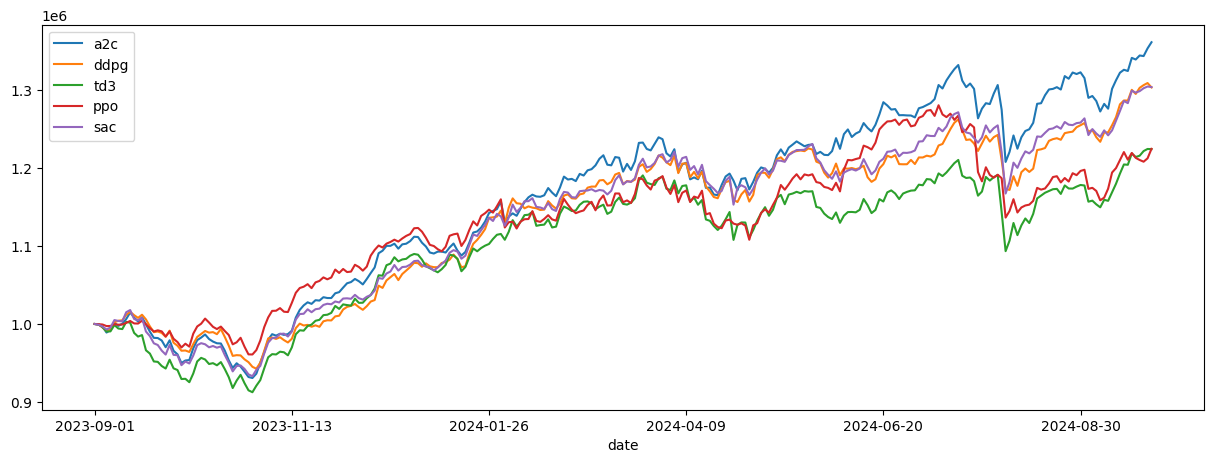

In [ ]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
result.plot();

In [ ]:
df_actions_a2c.to_csv("action_a2c.csv")
df_actions_ddpg.to_csv("action_ddpg.csv")
df_actions_ppo.to_csv("action_ppo.csv")
df_actions_sac.to_csv("action_sac.csv")
df_actions_td3.to_csv("action_td3.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
action_ppo = pd.read_csv("action_ppo.csv")
action_ddpg = pd.read_csv("action_ddpg.csv")
action_sac = pd.read_csv("action_sac.csv")
action_td3 = pd.read_csv("action_td3.csv")
action_a2c = pd.read_csv("action_a2c.csv")
turbulence_data = pd.read_csv("vix_and_turbulence.csv")

In [ ]:
# Convert date columns to datetime format for merging and plotting
action_data['date'] = pd.to_datetime(action_ppo['date'])
turbulence_data['date'] = pd.to_datetime(turbulence_data['date'])

# Select the actions for the specific stock (e.g., 'MSFT') and relevant date column
selected_stock = action_data[['date', 'MSFT']]

# Merge action data with turbulence data based on the date
merged_data = pd.merge(turbulence_data[['date','vix', 'turbulence']], selected_stock, on='date', how='inner')

# Separate buy and sell actions; use absolute values for sell actions on the positive y-axis
buy_actions = merged_data[merged_data['MSFT'] > 0]  # Buy actions (positive values)
sell_actions = merged_data[merged_data['MSFT'] < 0]  # Sell actions (negative values)
sell_actions['MSFT'] = sell_actions['MSFT'].abs()  # Take absolute value for plotting on positive y-axis


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

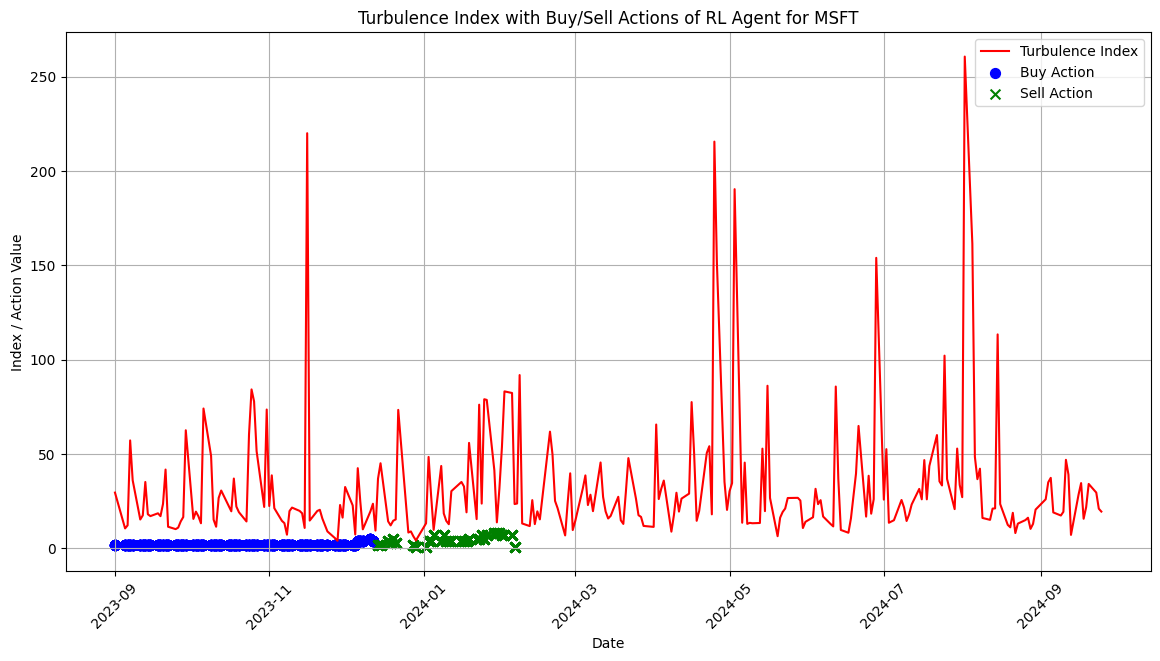

In [ ]:
# Plot turbulence index
plt.figure(figsize=(14, 7))
plt.plot(merged_data['date'], merged_data['turbulence'], label='Turbulence Index', color='red', linewidth=1.5)

# Plot buy actions as blue dots on positive y-axis
plt.scatter(buy_actions['date'], buy_actions['MSFT'], color='blue', label='Buy Action', marker='o', s=50)

# Plot sell actions as green dots on positive y-axis
plt.scatter(sell_actions['date'], sell_actions['MSFT'], color='green', label='Sell Action', marker='x', s=50)

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Index / Action Value')
plt.title('Turbulence Index with Buy/Sell Actions of RL Agent for MSFT')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

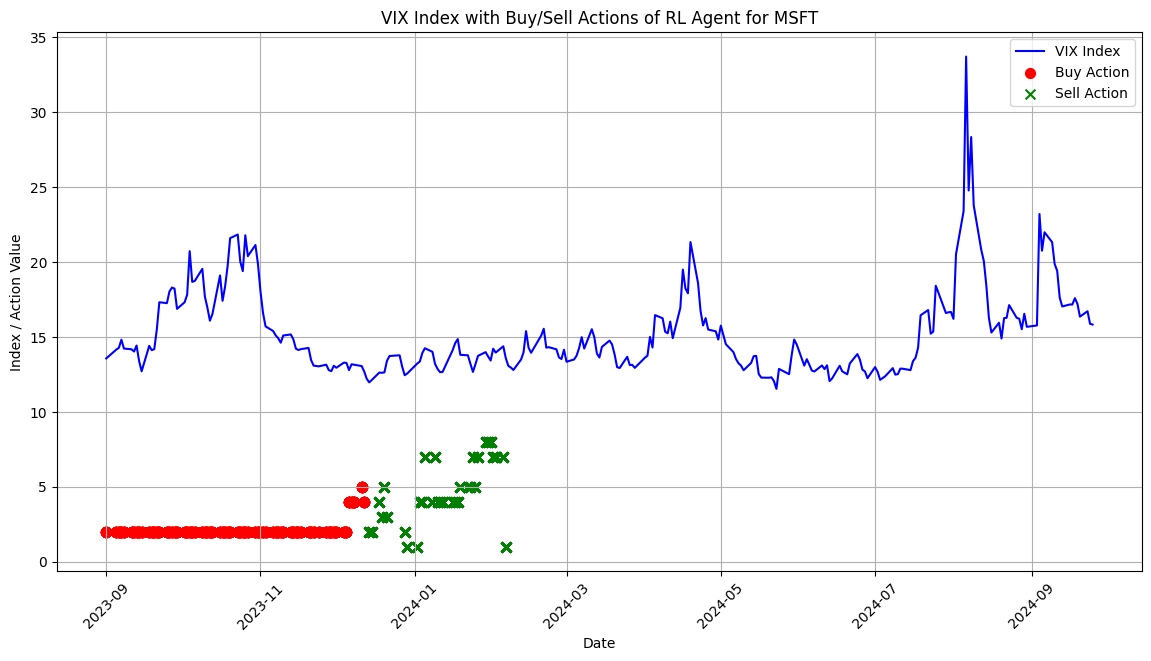

In [ ]:
# Plot turbulence index
plt.figure(figsize=(14, 7))
plt.plot(merged_data['date'], merged_data['vix'], label='VIX Index', color='blue', linewidth=1.5)

# Plot buy actions as blue dots on positive y-axis
plt.scatter(buy_actions['date'], buy_actions['MSFT'], color='red', label='Buy Action', marker='o', s=50)

# Plot sell actions as green dots on positive y-axis
plt.scatter(sell_actions['date'], sell_actions['MSFT'], color='green', label='Sell Action', marker='x', s=50)

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Index / Action Value')
plt.title('VIX Index with Buy/Sell Actions of RL Agent for MSFT')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Convert date columns to datetime format for merging and plotting
action_data['date'] = pd.to_datetime(action_data['date'])
turbulence_data['date'] = pd.to_datetime(turbulence_data['date'])

# Select the actions for the specific stock (e.g., 'MSFT') and relevant date column
selected_stock = action_data[['date', 'CSCO']]

# Merge action data with turbulence data based on the date
merged_data = pd.merge(turbulence_data[['date','vix', 'turbulence']], selected_stock, on='date', how='inner')

# Separate buy and sell actions; use absolute values for sell actions on the positive y-axis
buy_actions = merged_data[merged_data['CSCO'] > 0]  # Buy actions (positive values)
sell_actions = merged_data[merged_data['CSCO'] < 0]  # Sell actions (negative values)
sell_actions['CSCO'] = sell_actions['CSCO'].abs()  # Take absolute value for plotting on positive y-axis


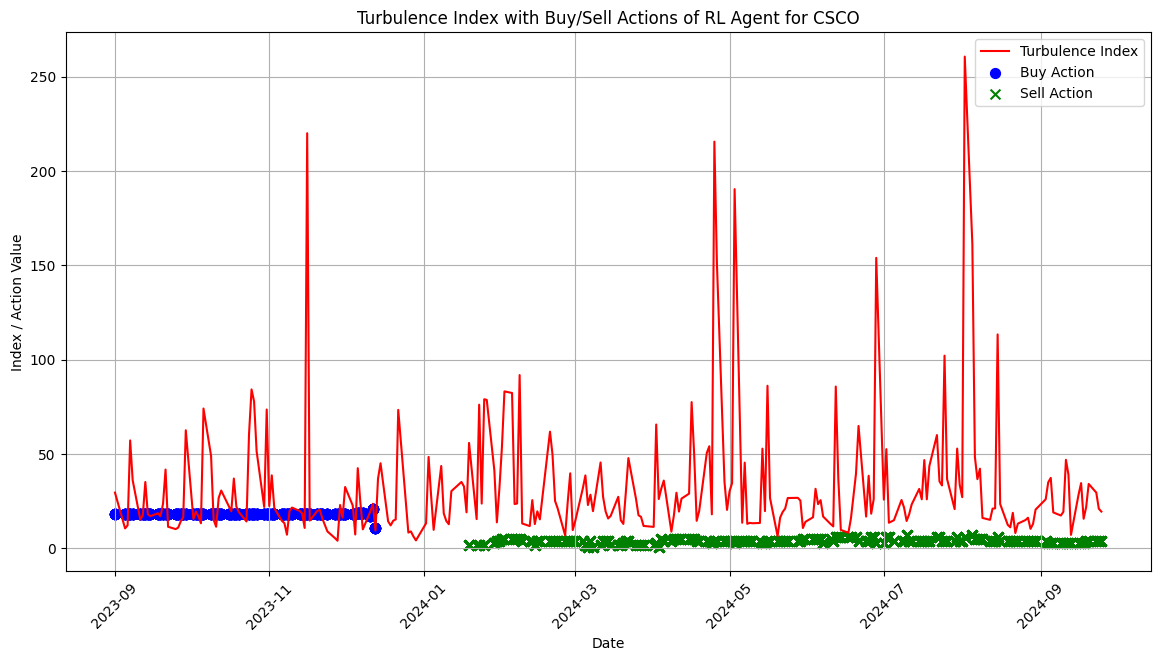

In [ ]:
# Plot turbulence index
plt.figure(figsize=(14, 7))
plt.plot(merged_data['date'], merged_data['turbulence'], label='Turbulence Index', color='red', linewidth=1.5)

# Plot buy actions as blue dots on positive y-axis
plt.scatter(buy_actions['date'], buy_actions['CSCO'], color='blue', label='Buy Action', marker='o', s=50)

# Plot sell actions as green dots on positive y-axis
plt.scatter(sell_actions['date'], sell_actions['CSCO'], color='green', label='Sell Action', marker='x', s=50)

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Index / Action Value')
plt.title('Turbulence Index with Buy/Sell Actions of RL Agent for CSCO')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

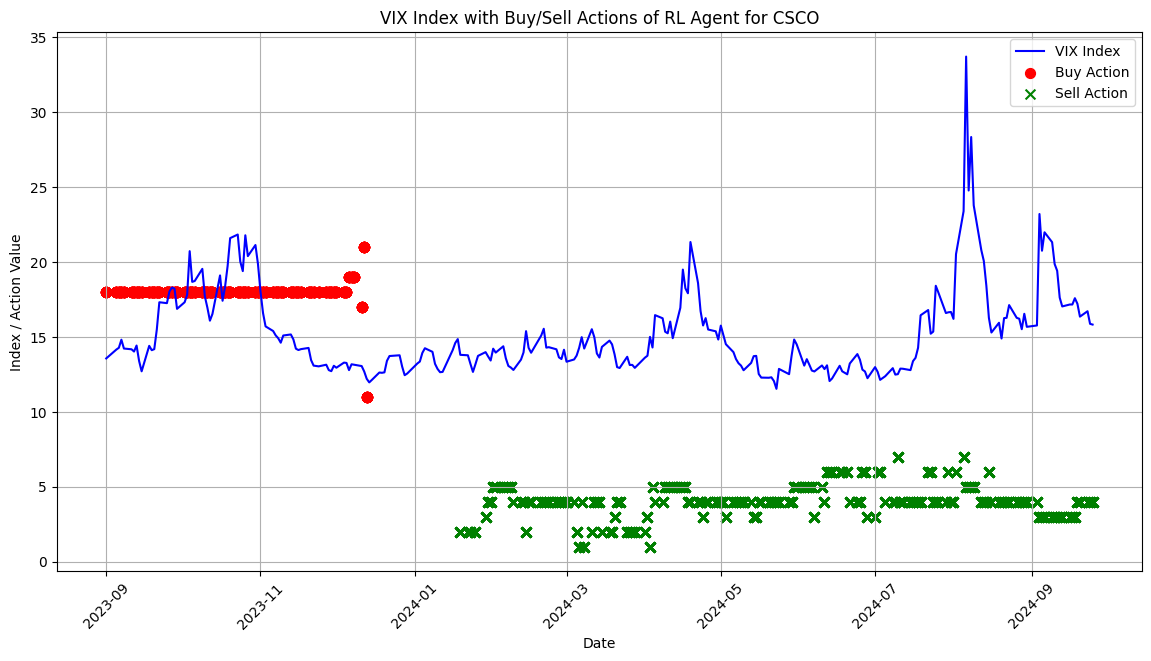

In [ ]:
# Plot turbulence index
plt.figure(figsize=(14, 7))
plt.plot(merged_data['date'], merged_data['vix'], label='VIX Index', color='blue', linewidth=1.5)

# Plot buy actions as blue dots on positive y-axis
plt.scatter(buy_actions['date'], buy_actions['CSCO'], color='red', label='Buy Action', marker='o', s=50)

# Plot sell actions as green dots on positive y-axis
plt.scatter(sell_actions['date'], sell_actions['CSCO'], color='green', label='Sell Action', marker='x', s=50)

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Index / Action Value')
plt.title('VIX Index with Buy/Sell Actions of RL Agent for CSCO')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [ ]:
action_data = pd.read_csv("action_sac.csv")
turbulence_data = pd.read_csv("vix_and_turbulence.csv")

In [ ]:
# Convert date columns to datetime format for merging and plotting
action_data['date'] = pd.to_datetime(action_data['date'])
turbulence_data['date'] = pd.to_datetime(turbulence_data['date'])

# Select the actions for the specific stock (e.g., 'MSFT') and relevant date column
selected_stock = action_data[['date', 'CSCO']]

# Merge action data with turbulence data based on the date
merged_data = pd.merge(turbulence_data[['date','vix', 'turbulence']], selected_stock, on='date', how='inner')

# Separate buy and sell actions; use absolute values for sell actions on the positive y-axis
buy_actions = merged_data[merged_data['CSCO'] > 0]  # Buy actions (positive values)
sell_actions = merged_data[merged_data['CSCO'] < 0]  # Sell actions (negative values)
sell_actions['CSCO'] = sell_actions['CSCO'].abs()  # Take absolute value for plotting on positive y-axis


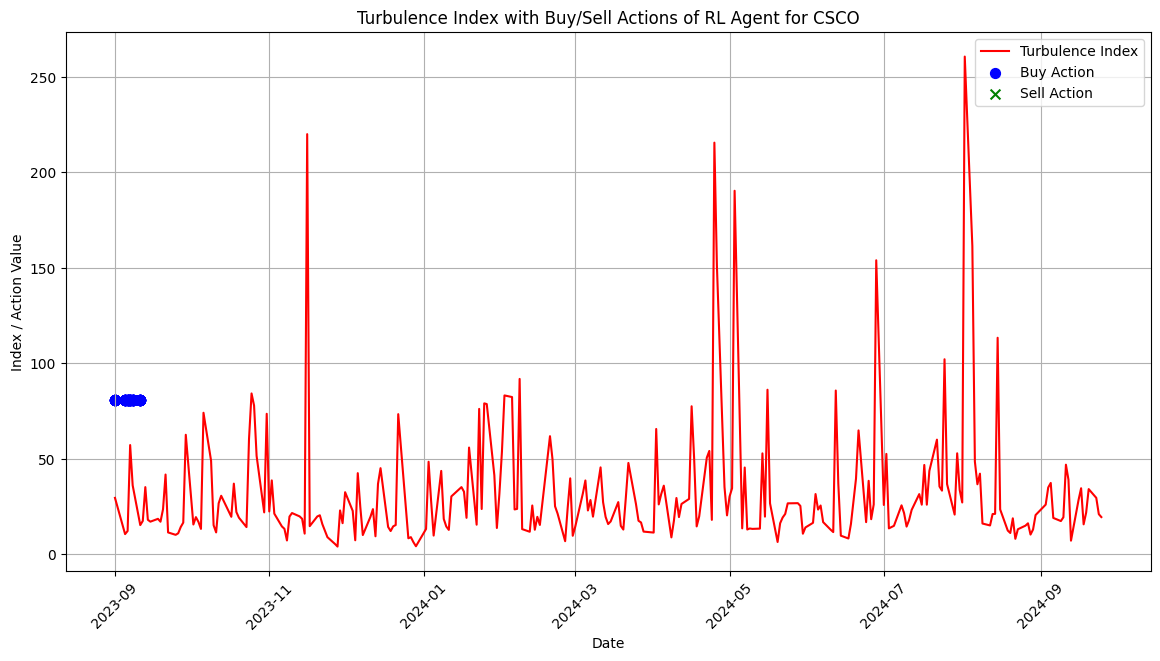

In [ ]:
# Plot turbulence index
plt.figure(figsize=(14, 7))
plt.plot(merged_data['date'], merged_data['turbulence'], label='Turbulence Index', color='red', linewidth=1.5)

# Plot buy actions as blue dots on positive y-axis
plt.scatter(buy_actions['date'], buy_actions['CSCO'], color='blue', label='Buy Action', marker='o', s=50)

# Plot sell actions as green dots on positive y-axis
plt.scatter(sell_actions['date'], sell_actions['CSCO'], color='green', label='Sell Action', marker='x', s=50)

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Index / Action Value')
plt.title('Turbulence Index with Buy/Sell Actions of RL Agent for CSCO')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

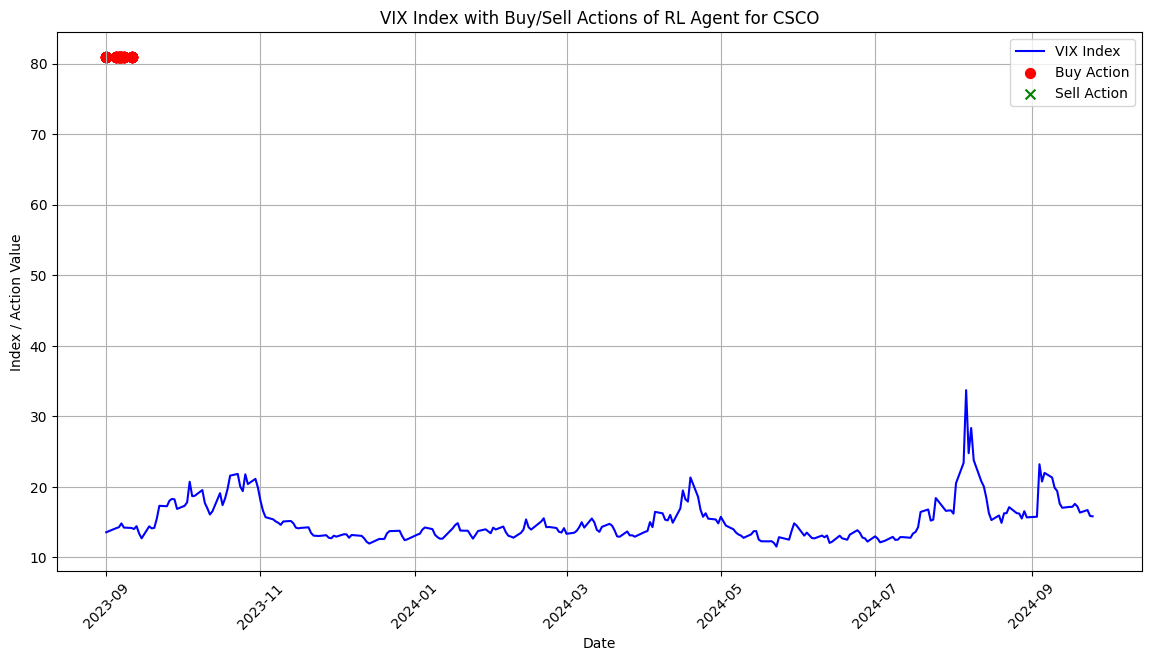

In [ ]:
# Plot turbulence index
plt.figure(figsize=(14, 7))
plt.plot(merged_data['date'], merged_data['vix'], label='VIX Index', color='blue', linewidth=1.5)

# Plot buy actions as blue dots on positive y-axis
plt.scatter(buy_actions['date'], buy_actions['CSCO'], color='red', label='Buy Action', marker='o', s=50)

# Plot sell actions as green dots on positive y-axis
plt.scatter(sell_actions['date'], sell_actions['CSCO'], color='green', label='Sell Action', marker='x', s=50)

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Index / Action Value')
plt.title('VIX Index with Buy/Sell Actions of RL Agent for CSCO')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Convert date columns to datetime format for merging and plotting
action_data['date'] = pd.to_datetime(action_data['date'])
turbulence_data['date'] = pd.to_datetime(turbulence_data['date'])

# Select the actions for the specific stock (e.g., 'MSFT') and relevant date column
selected_stock = action_data[['date', 'MSFT']]

# Merge action data with turbulence data based on the date
merged_data = pd.merge(turbulence_data[['date','vix', 'turbulence']], selected_stock, on='date', how='inner')

# Separate buy and sell actions; use absolute values for sell actions on the positive y-axis
buy_actions = merged_data[merged_data['MSFT'] > 0]  # Buy actions (positive values)
sell_actions = merged_data[merged_data['MSFT'] < 0]  # Sell actions (negative values)
sell_actions['MSFT'] = sell_actions['MSFT'].abs()  # Take absolute value for plotting on positive y-axis


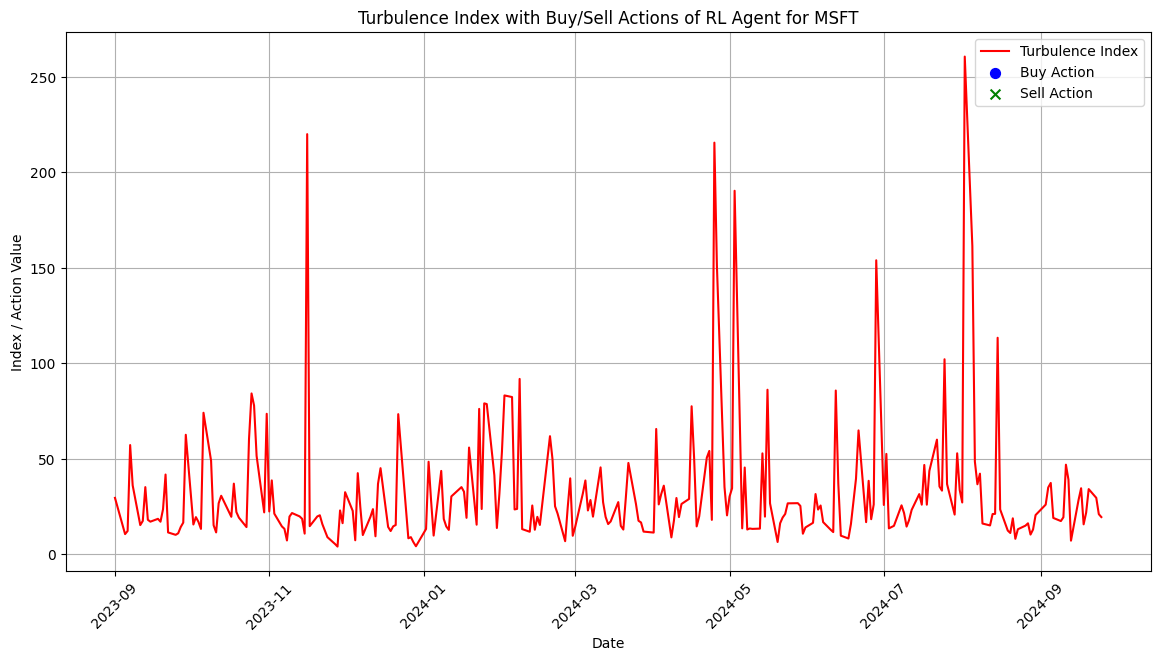

In [ ]:
# Plot turbulence index
plt.figure(figsize=(14, 7))
plt.plot(merged_data['date'], merged_data['turbulence'], label='Turbulence Index', color='red', linewidth=1.5)

# Plot buy actions as blue dots on positive y-axis
plt.scatter(buy_actions['date'], buy_actions['MSFT'], color='blue', label='Buy Action', marker='o', s=50)

# Plot sell actions as green dots on positive y-axis
plt.scatter(sell_actions['date'], sell_actions['MSFT'], color='green', label='Sell Action', marker='x', s=50)

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Index / Action Value')
plt.title('Turbulence Index with Buy/Sell Actions of RL Agent for MSFT')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [ ]:
import yfinance as yf
import pandas as pd

# Define the stock tickers and time period
tickers = ["NVDA", "AMZN"]
years = ["2021", "2022", "2023"]

# Create an empty dictionary to store the data
data = {ticker: {} for ticker in tickers}

# Loop through each ticker and collect data
for ticker in tickers:
    stock = yf.Ticker(ticker)

    # Fetch stock price and fundamental data
    for year in years:
        year_data = {}

        # Price to Earnings (PE) ratio
        try:
            year_data["PE"] = stock.info["trailingPE"]
        except KeyError:
            year_data["PE"] = None

        # PEG Ratio (Price/Earnings to Growth)
        try:
            year_data["PEG"] = stock.info["pegRatio"]
        except KeyError:
            year_data["PEG"] = None

        # EBITDA (Earnings Before Interest, Taxes, Depreciation, and Amortization)
        try:
            year_data["EBITDA"] = stock.info["ebitda"]
        except KeyError:
            year_data["EBITDA"] = None

        # EV/EBITDA
        try:
            enterprise_value = stock.info["enterpriseValue"]
            ebitda = stock.info["ebitda"]
            if ebitda and enterprise_value:
                year_data["EV/EBITDA"] = enterprise_value / ebitda
            else:
                year_data["EV/EBITDA"] = None
        except KeyError:
            year_data["EV/EBITDA"] = None

        # Price to Cash Flow (P/CF)
        try:
            # Get annual cash flow data to avoid inconsistencies
            cash_flow = stock.cashflow.loc[year].get("Total Cash From Operating Activities", None)
            shares_outstanding = stock.info["sharesOutstanding"]  # Approximation
            price = stock.history(start=f"{year}-01-01", end=f"{year}-12-31")['Close'].mean()
            if cash_flow and price and shares_outstanding:
                year_data["P/CF"] = price / (cash_flow / shares_outstanding)
            else:
                year_data["P/CF"] = None
        except Exception as e:
            year_data["P/CF"] = None

        data[ticker][year] = year_data

# Convert to DataFrame for easy handling
df_nvidia = pd.DataFrame(data["NVDA"]).T
df_amazon = pd.DataFrame(data["AMZN"]).T

print("NVIDIA Financial Ratios")
print(df_nvidia)
print("\nAmazon Financial Ratios")
print(df_amazon)


NVIDIA Financial Ratios
            PE   PEG        EBITDA  EV/EBITDA  P/CF
2021  68.58644  0.89  6.118400e+10  57.832812   NaN
2022  68.58644  0.89  6.118400e+10  57.832812   NaN
2023  68.58644  0.89  6.118400e+10  57.832812   NaN

Amazon Financial Ratios
             PE   PEG        EBITDA  EV/EBITDA  P/CF
2021  44.436832  1.22  1.115830e+11  20.123216   NaN
2022  44.436832  1.22  1.115830e+11  20.123216   NaN
2023  44.436832  1.22  1.115830e+11  20.123216   NaN


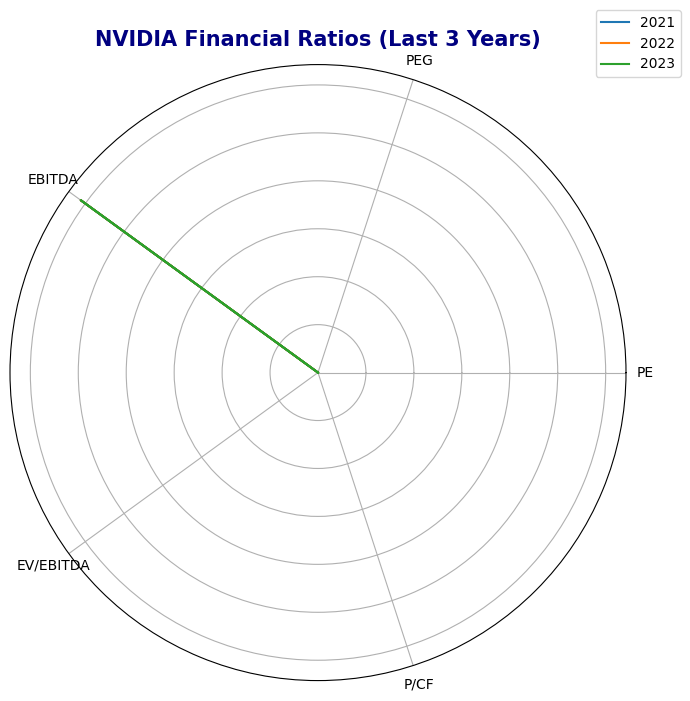

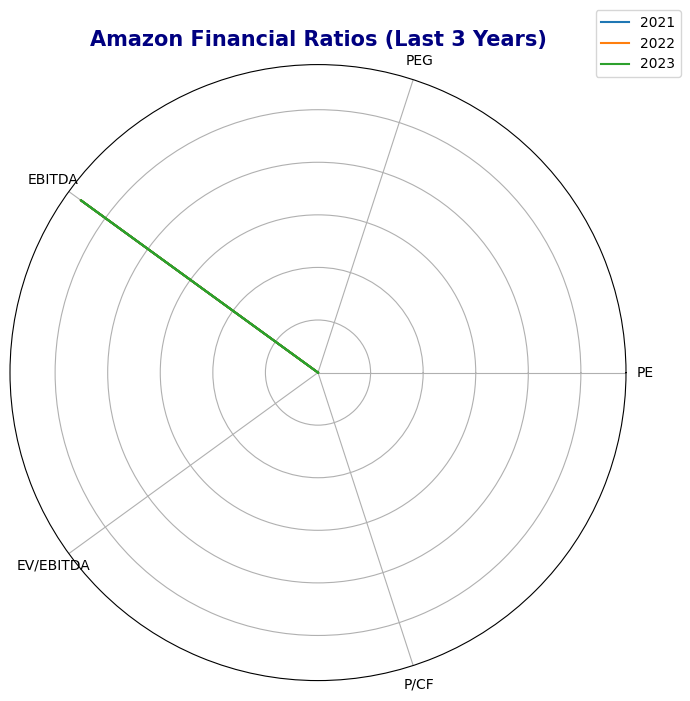

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot radar chart for a single stock's financial ratios
def plot_radar_chart(df, company_name):
    # Get the metrics and years
    metrics = df.columns
    years = df.index

    # Number of variables and angles for radar chart
    num_vars = len(metrics)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # The plot is closed by looping back to the start
    angles += angles[:1]

    # Set up radar chart
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    for year in years:
        values = df.loc[year].values.flatten().tolist()
        values += values[:1]  # Complete the loop
        ax.plot(angles, values, label=year)
        ax.fill(angles, values, alpha=0.1)

    # Add labels and title
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)
    ax.set_title(f"{company_name} Financial Ratios (Last 3 Years)", size=15, color='navy', weight='bold')
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    plt.show()

# Plot radar charts for NVIDIA and Amazon
plot_radar_chart(df_nvidia, "NVIDIA")
plot_radar_chart(df_amazon, "Amazon")


In [ ]:
import yfinance as yf
import pandas as pd

# Define the stock ticker and years of interest
ticker = "NVDA"
years = ["2019","2020","2021", "2022", "2023"]

# Initialize an empty dictionary to store data
data = {}

# Fetch stock data
stock = yf.Ticker(ticker)

# Pull historical prices over 5 years to cover the past 3 years
prices = stock.history(period="5y")["Close"]
prices.index = pd.to_datetime(prices.index)  # Ensure the index is datetime
prices = prices.resample("Y").last()  # 'Y' for year-end

# Get annual financial data
income_statement = stock.financials
balance_sheet = stock.balance_sheet
cash_flow = stock.cashflow

for year in years:
    # Parse financial data for the specific year
    year_data = {}

    try:
        # Calculate Price to Earnings (PE) ratio: Price / EPS
        net_income = income_statement.at["Net Income", year] if "Net Income" in income_statement.index else None
        shares_outstanding = balance_sheet.at["Common Stock", year] if "Common Stock" in balance_sheet.index else None
        price = prices.at[f"{year}-12-31"] if f"{year}-12-31" in prices.index else None

        # Check if data is not missing before calculation
        if pd.notna(net_income) and pd.notna(shares_outstanding) and pd.notna(price):
            eps = net_income / shares_outstanding
            year_data["PE"] = price / eps if eps != 0 else None
        else:
            year_data["PE"] = None
    except KeyError:
        year_data["PE"] = None

    # EBITDA and EV/EBITDA calculation (approximation)
    try:
        ebitda = income_statement.at["EBITDA", year] if "EBITDA" in income_statement.index else None
        if pd.notna(ebitda) and pd.notna(price) and pd.notna(shares_outstanding):
            enterprise_value = price * shares_outstanding  # Approximation
            year_data["EV/EBITDA"] = enterprise_value / ebitda if ebitda != 0 else None
        else:
            year_data["EV/EBITDA"] = None
    except KeyError:
        year_data["EV/EBITDA"] = None

    # Store the year’s data
    data[year] = year_data

# Convert to DataFrame
df_nvidia = pd.DataFrame(data).T
print(df_nvidia)


<ipython-input-62-2d72168a2c32>:17: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  prices = prices.resample("Y").last()  # 'Y' for year-end


TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
import yfinance as yf
import pandas as pd

# Define the stock ticker and years of interest
ticker = "NVDA"
years = ["2021", "2022", "2023"]

# Initialize an empty dictionary to store data
data = {}

# Fetch stock data
stock = yf.Ticker(ticker)

# Pull historical prices over 5 years to cover the past 3 years
prices = stock.history(period="5y")["Close"]
prices.index = pd.to_datetime(prices.index)  # Ensure the index is datetime
prices = prices.resample("Y").last()  # 'Y' for year-end

# Get annual financial data
income_statement = stock.financials.transpose()  # Transpose so years are columns
balance_sheet = stock.balance_sheet.transpose()  # Transpose so years are columns
cash_flow = stock.cashflow.transpose()  # Transpose so years are columns

for year in years:
    # Parse financial data for the specific year
    year_data = {}

    try:
        # Calculate Price to Earnings (PE) ratio: Price / EPS
        if year in income_statement.index and "Net Income" in income_statement.columns:
            net_income = income_statement.loc[year, "Net Income"]
        else:
            net_income = None

        if year in balance_sheet.index and "Common Stock" in balance_sheet.columns:
            shares_outstanding = balance_sheet.loc[year, "Common Stock"]
        else:
            shares_outstanding = None

        price = prices.at[f"{year}-12-31"] if f"{year}-12-31" in prices.index else None

        # Check if data is not missing before calculation
        if pd.notna(net_income) and pd.notna(shares_outstanding) and pd.notna(price):
            eps = net_income / shares_outstanding
            year_data["PE"] = price / eps if eps != 0 else None
        else:
            year_data["PE"] = None
    except KeyError:
        year_data["PE"] = None

    # EBITDA and EV/EBITDA calculation (approximation)
    try:
        if year in income_statement.index and "EBITDA" in income_statement.columns:
            ebitda = income_statement.loc[year, "EBITDA"]
        else:
            ebitda = None

        if pd.notna(ebitda) and pd.notna(price) and pd.notna(shares_outstanding):
            enterprise_value = price * shares_outstanding  # Approximation
            year_data["EV/EBITDA"] = enterprise_value / ebitda if ebitda != 0 else None
        else:
            year_data["EV/EBITDA"] = None
    except KeyError:
        year_data["EV/EBITDA"] = None

    # Store the year’s data
    data[year] = year_data

# Convert to DataFrame
df_nvidia = pd.DataFrame(data).T
print(df_nvidia)


<ipython-input-63-4719308056fb>:17: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  prices = prices.resample("Y").last()  # 'Y' for year-end


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

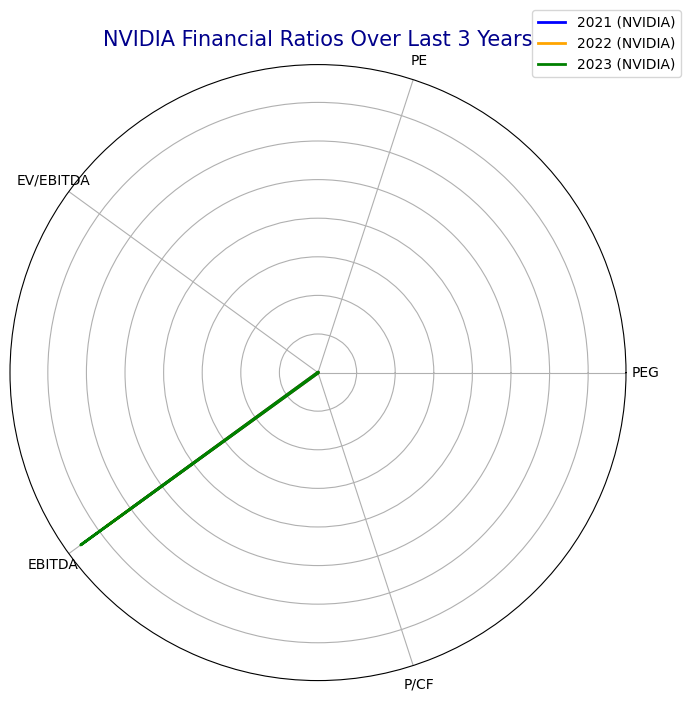

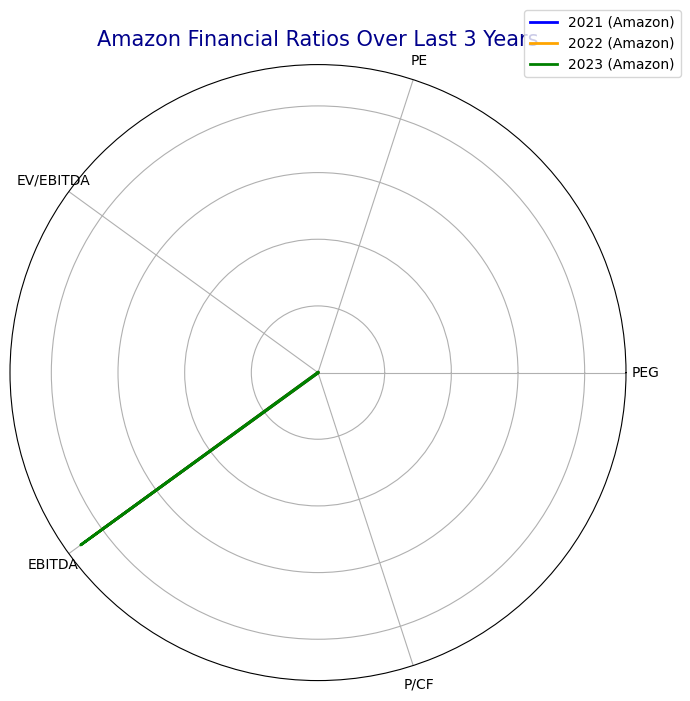

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data for NVIDIA and Amazon over the last 3 years (replace with actual data)
# Columns are ratios (PEG, PE, EV/EBITDA, EBITDA, P/CF) and rows are years (e.g., 2021, 2022, 2023)
data = {
    'Year': ['2021', '2022', '2023'],
    'PEG': [1.2, 1.1, 1.3],
    'PE': [35, 32, 30],
    'EV/EBITDA': [22, 20, 18],
    'EBITDA': [15000, 17000, 19000],
    'P/CF': [25, 24, 23]
}

# Convert data to DataFrames for NVIDIA and Amazon
nvidia_data = pd.DataFrame(data)
amazon_data = pd.DataFrame({
    'Year': ['2021', '2022', '2023'],
    'PEG': [1.5, 1.4, 1.2],
    'PE': [80, 75, 70],
    'EV/EBITDA': [28, 25, 22],
    'EBITDA': [40000, 42000, 44000],
    'P/CF': [45, 42, 40]
})

# Function to plot radar chart for a single stock
def plot_radar_chart(df, stock_name):
    # Define number of variables and create angle values for radar chart
    labels = df.columns[1:]  # Exclude 'Year' column
    num_vars = len(labels)

    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    # Initialize radar plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Plot each year's data in a different color
    colors = ['blue', 'orange', 'green']
    for i, row in df.iterrows():
        values = row[1:].tolist()
        values += values[:1]  # Complete the loop
        ax.plot(angles, values, label=f"{row['Year']} ({stock_name})", color=colors[i], linewidth=2)
        ax.fill(angles, values, color=colors[i], alpha=0.25)

    # Add labels and legend
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    plt.title(f"{stock_name} Financial Ratios Over Last 3 Years", size=15, color='darkblue')
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    plt.show()

# Plot radar charts for NVIDIA and Amazon
plot_radar_chart(nvidia_data, 'NVIDIA')
plot_radar_chart(amazon_data, 'Amazon')


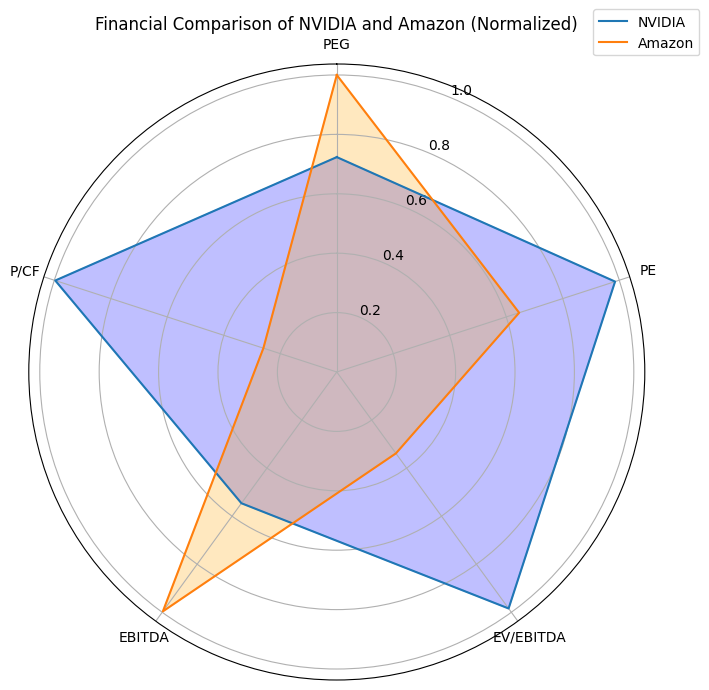

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the financial metrics and values for NVIDIA and Amazon
metrics = ['PEG', 'PE', 'EV/EBITDA', 'EBITDA', 'P/CF']
nvidia_values = [1.23, 68.96, 59.05, 61.18, 74.75]
amazon_values = [1.70, 45.19, 20.32, 111.58, 19.49]

# Normalize the values for better comparison on radar chart
# Since EBITDA is in billions and the range is large, we can normalize each metric individually
normalized_nvidia_values = [1.23/1.7, 68.96/70, 59.05/60, 61.18/112, 74.75/75]
normalized_amazon_values = [1.70/1.7, 45.19/70, 20.32/60, 111.58/112, 19.49/75]

# Number of variables
num_vars = len(metrics)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The radar chart requires a full loop, so we "wrap" the data
nvidia_values_wrap = normalized_nvidia_values + normalized_nvidia_values[:1]
amazon_values_wrap = normalized_amazon_values + normalized_amazon_values[:1]
angles_wrap = angles + angles[:1]

# Plotting
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Draw one axe per variable + add labels
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label
plt.xticks(angles, metrics)

# Plot data for NVIDIA and Amazon
ax.plot(angles_wrap, nvidia_values_wrap, linewidth=1.5, linestyle='solid', label='NVIDIA')
ax.fill(angles_wrap, nvidia_values_wrap, color='blue', alpha=0.25)

ax.plot(angles_wrap, amazon_values_wrap, linewidth=1.5, linestyle='solid', label='Amazon')
ax.fill(angles_wrap, amazon_values_wrap, color='orange', alpha=0.25)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Title
plt.title("Financial Comparison of NVIDIA and Amazon (Normalized)")

plt.show()


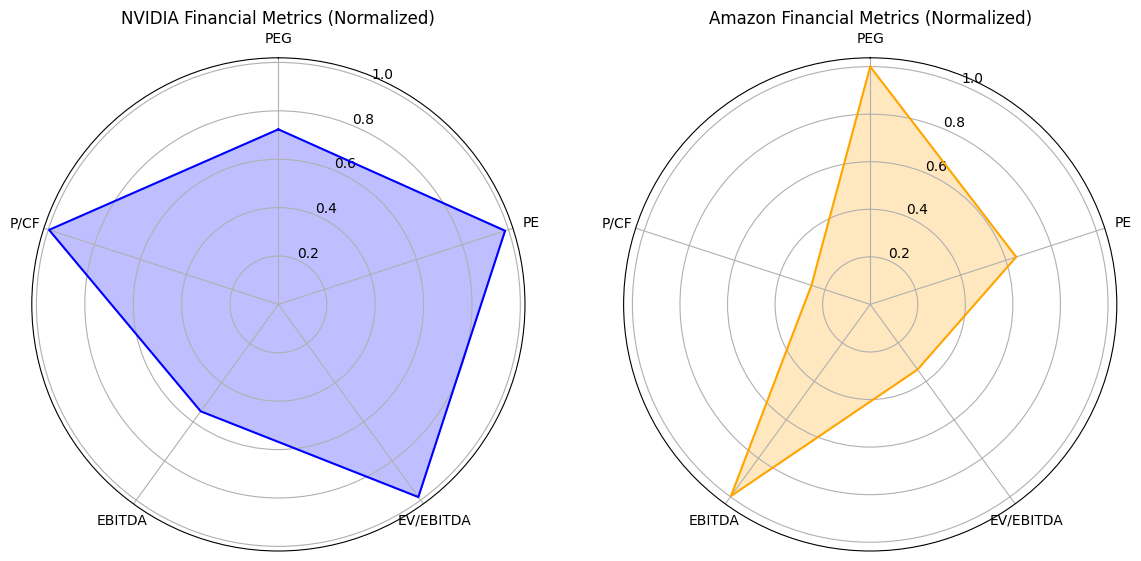

In [ ]:
# Plotting two separate radar charts for NVIDIA and Amazon
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), subplot_kw=dict(polar=True))

# Draw one axe per variable + add labels
for ax in [ax1, ax2]:
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles)
    ax.set_xticklabels(metrics)

# Plot and fill for NVIDIA
ax1.plot(angles_wrap, nvidia_values_wrap, linewidth=1.5, linestyle='solid', color='blue')
ax1.fill(angles_wrap, nvidia_values_wrap, color='blue', alpha=0.25)
ax1.set_title("NVIDIA Financial Metrics (Normalized)")

# Plot and fill for Amazon
ax2.plot(angles_wrap, amazon_values_wrap, linewidth=1.5, linestyle='solid', color='orange')
ax2.fill(angles_wrap, amazon_values_wrap, color='orange', alpha=0.25)
ax2.set_title("Amazon Financial Metrics (Normalized)")

plt.show()


In [ ]:
import pandas as pd

# Define hypothetical data for Amazon's segment peers
amazon_peers = pd.DataFrame({
    'Company': ['Amazon', 'Alibaba', 'Shopify', 'eBay'],
    'P/E': [23.5, 18.2, 25.7, 19.8],
    'PEG': [1.3, 1.1, 1.5, 1.2],
    'EV/EBITDA': [15.0, 14.5, 16.3, 15.2],
    'EBITDA_margin': [20, 18, 22, 19],
    'P/CF': [23, 21, 25, 22]
})

# Calculate segment averages for Amazon
amazon_segment_avg = amazon_peers.drop(columns='Company').mean()

print("Amazon Segment Averages:")
print(amazon_segment_avg)

# Define hypothetical data for NVIDIA's segment peers
nvidia_peers = pd.DataFrame({
    'Company': ['NVIDIA', 'AMD', 'Intel', 'Qualcomm'],
    'P/E': [27.5, 22.1, 15.8, 18.5],
    'PEG': [1.4, 1.3, 1.0, 1.2],
    'EV/EBITDA': [20.3, 18.6, 16.2, 17.5],
    'EBITDA_margin': [35, 33, 30, 32],
    'P/CF': [30, 27, 24, 26]
})

# Calculate segment averages for NVIDIA
nvidia_segment_avg = nvidia_peers.drop(columns='Company').mean()

print("\nNVIDIA Segment Averages:")
print(nvidia_segment_avg)


Amazon Segment Averages:
P/E              21.800
PEG               1.275
EV/EBITDA        15.250
EBITDA_margin    19.750
P/CF             22.750
dtype: float64

NVIDIA Segment Averages:
P/E              20.975
PEG               1.225
EV/EBITDA        18.150
EBITDA_margin    32.500
P/CF             26.750
dtype: float64


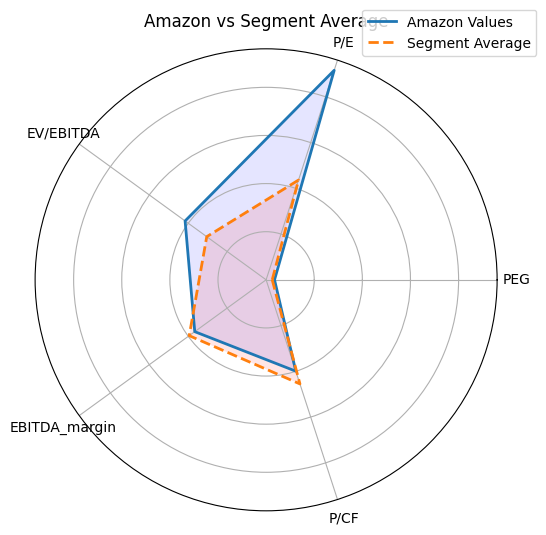

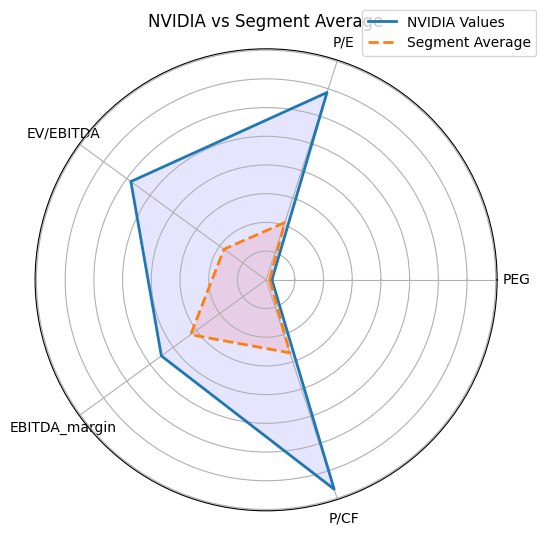

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

# Sample data (replace with actual current data)
amazon_values = {'PEG': 1.75, 'P/E': 45.78, 'EV/EBITDA': 20.81, 'EBITDA_margin': 18.33, 'P/CF': 19.97}
nvidia_values = {'PEG': 2.03, 'P/E': 68.6, 'EV/EBITDA': 58.24, 'EBITDA_margin': 45.10, 'P/CF': 76.7}
amazon_segment_avg = {'PEG': 1.27, 'P/E': 21.80, 'EV/EBITDA': 15.25, 'EBITDA_margin': 19.75, 'P/CF': 22.75}
nvidia_segment_avg = {'PEG': 1.22, 'P/E': 20.97, 'EV/EBITDA': 18.15, 'EBITDA_margin':  32.50, 'P/CF': 26.75}

# Prepare data for radar chart
def prepare_data(values, segment_avg):
    categories = list(values.keys())
    n_metrics = len(categories)

    # Convert values and segment averages to lists
    values_list = list(values.values())
    segment_avg_list = list(segment_avg.values())

    # Repeat the first value at the end to close the radar chart
    values_list += values_list[:1]
    segment_avg_list += segment_avg_list[:1]

    # Create angles for each axis
    angles = [n / float(n_metrics) * 2 * pi for n in range(n_metrics)]
    angles += angles[:1]

    return categories, angles, values_list, segment_avg_list

# Function to plot radar chart
def plot_radar_chart(company_name, values, segment_avg):
    categories, angles, values_list, segment_avg_list = prepare_data(values, segment_avg)

    # Initialize radar chart
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Plot data for company and segment average
    ax.plot(angles, values_list, linewidth=2, linestyle='solid', label=f'{company_name} Values')
    ax.fill(angles, values_list, 'b', alpha=0.1)

    ax.plot(angles, segment_avg_list, linewidth=2, linestyle='dashed', label='Segment Average')
    ax.fill(angles, segment_avg_list, 'r', alpha=0.1)

    # Add labels
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Add title and legend
    plt.title(f'{company_name} vs Segment Average')
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    plt.show()

# Plot radar charts for Amazon and NVIDIA
plot_radar_chart("Amazon", amazon_values, amazon_segment_avg)
plot_radar_chart("NVIDIA", nvidia_values, nvidia_segment_avg)


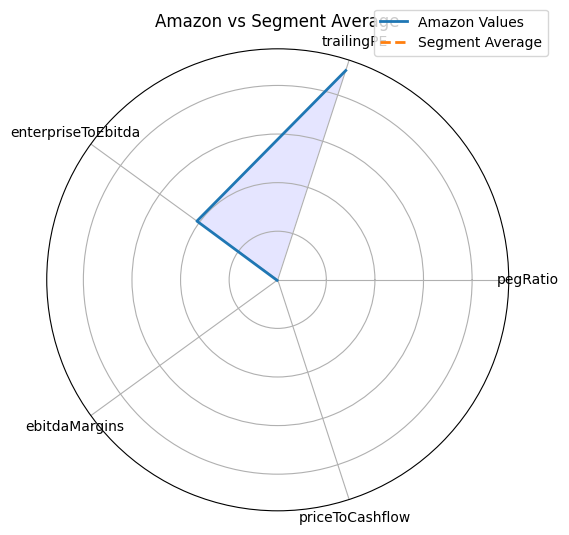

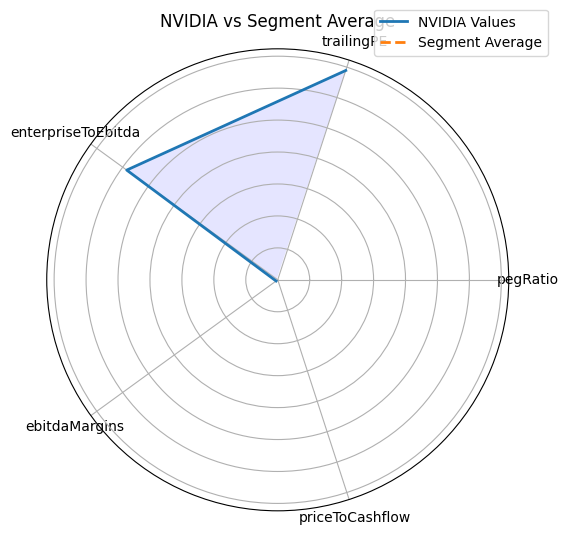

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import yfinance as yf

# List of financial metrics we want to retrieve
metrics = ['pegRatio', 'trailingPE', 'enterpriseToEbitda', 'ebitdaMargins', 'priceToCashflow']

# Function to fetch financial data for a company
def fetch_company_data(ticker):
    stock = yf.Ticker(ticker)
    info = stock.info

    # Fetch specific metrics and handle any missing data
    data = {metric: info.get(metric, np.nan) for metric in metrics}
    return data

# Function to identify sector-based peer companies (example list)
def get_peer_tickers(sector):
    sector_peers = {
        'Consumer Cyclical': ['AMZN', 'BABA', 'WMT', 'COST', 'TGT'],
        'Technology': ['NVDA', 'AAPL', 'AMD', 'INTC', 'MSFT'],
        # Add more sectors and peers as needed
    }
    return sector_peers.get(sector, [])

# Function to fetch peer/segment average data
def fetch_segment_average(ticker):
    stock = yf.Ticker(ticker)
    sector = stock.info.get('sector', None)

    if not sector:
        return {metric: np.nan for metric in metrics}  # Handle missing sector info

    peer_tickers = get_peer_tickers(sector)
    peer_tickers = [t for t in peer_tickers if t != ticker]  # Exclude the target company itself

    peer_data = []
    for peer in peer_tickers:
        data = fetch_company_data(peer)
        if not any(pd.isnull(val) for val in data.values()):  # Filter incomplete data
            peer_data.append(data)

    if peer_data:
        peer_df = pd.DataFrame(peer_data)
        segment_avg = peer_df.mean().to_dict()
        return segment_avg
    else:
        return {metric: np.nan for metric in metrics}  # Return empty average if no peers

# Prepare data for radar chart
def prepare_data(values, segment_avg):
    categories = list(values.keys())
    n_metrics = len(categories)

    values_list = list(values.values())
    segment_avg_list = list(segment_avg.values())

    values_list += values_list[:1]
    segment_avg_list += segment_avg_list[:1]

    angles = [n / float(n_metrics) * 2 * pi for n in range(n_metrics)]
    angles += angles[:1]

    return categories, angles, values_list, segment_avg_list

# Function to plot radar chart
def plot_radar_chart(company_name, values, segment_avg):
    categories, angles, values_list, segment_avg_list = prepare_data(values, segment_avg)

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, values_list, linewidth=2, linestyle='solid', label=f'{company_name} Values')
    ax.fill(angles, values_list, 'b', alpha=0.1)

    ax.plot(angles, segment_avg_list, linewidth=2, linestyle='dashed', label='Segment Average')
    ax.fill(angles, segment_avg_list, 'r', alpha=0.1)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    plt.title(f'{company_name} vs Segment Average')
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.show()

# Main function to plot radar chart for a given company
def dynamic_radar_chart(company_name, ticker):
    company_data = fetch_company_data(ticker)
    segment_avg_data = fetch_segment_average(ticker)

    plot_radar_chart(company_name, company_data, segment_avg_data)

# Example: Fetch and plot data for Amazon and NVIDIA
dynamic_radar_chart("Amazon", "AMZN")
dynamic_radar_chart("NVIDIA", "NVDA")


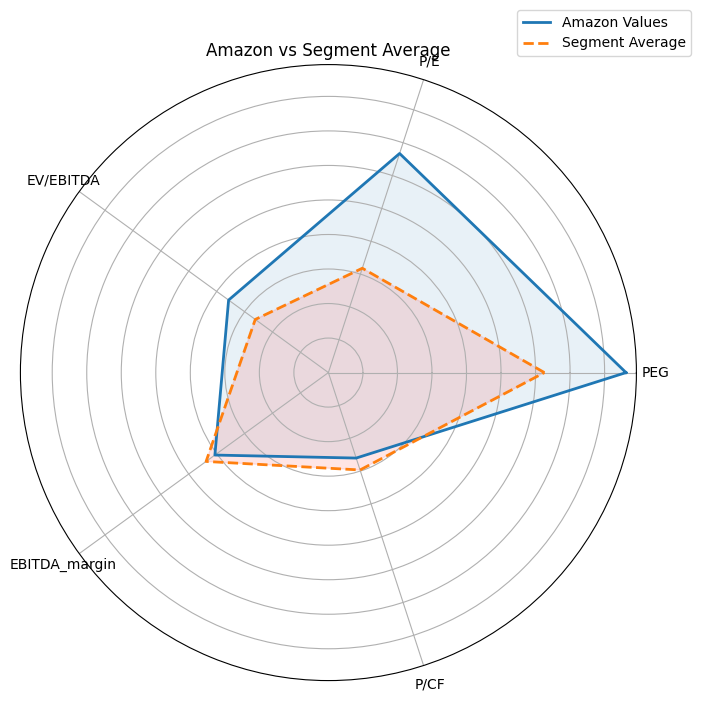

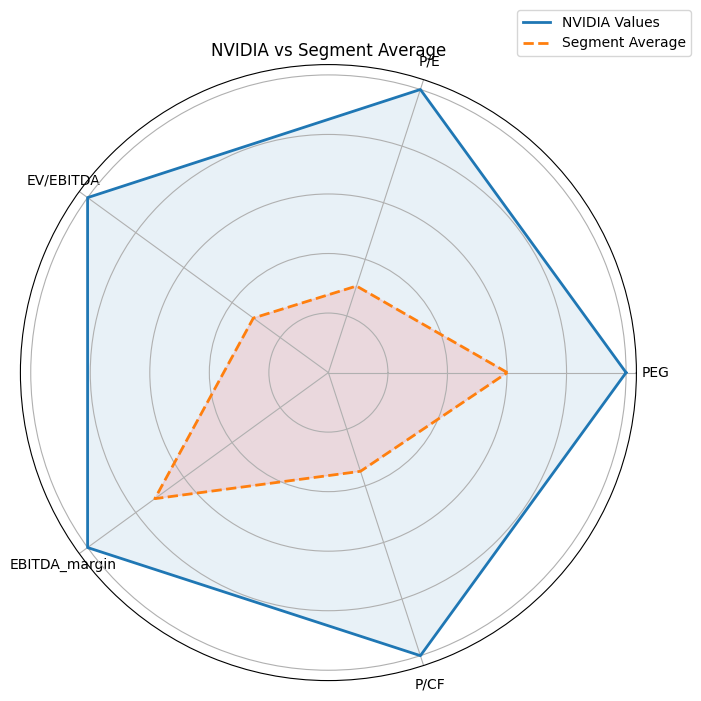

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Actual data (replace with up-to-date values if needed)
amazon_values = {'PEG': 1.75, 'P/E': 45.78, 'EV/EBITDA': 20.81, 'EBITDA_margin': 18.33, 'P/CF': 19.97}
nvidia_values = {'PEG': 2.03, 'P/E': 68.6, 'EV/EBITDA': 58.24, 'EBITDA_margin': 45.10, 'P/CF': 76.7}
amazon_segment_avg = {'PEG': 1.27, 'P/E': 21.80, 'EV/EBITDA': 15.25, 'EBITDA_margin': 19.75, 'P/CF': 22.75}
nvidia_segment_avg = {'PEG': 1.22, 'P/E': 20.97, 'EV/EBITDA': 18.15, 'EBITDA_margin': 32.50, 'P/CF': 26.75}

# Normalize values by dividing by the maximum in each category
def normalize_by_category(values, max_values):
    return [v / max_values[k] for k, v in values.items()]

# Max values across all data for normalization
max_values = {k: max(amazon_values[k], nvidia_values[k], amazon_segment_avg[k], nvidia_segment_avg[k])
              for k in amazon_values.keys()}

# Normalize company and segment values
normalized_amazon_values = normalize_by_category(amazon_values, max_values)
normalized_nvidia_values = normalize_by_category(nvidia_values, max_values)
normalized_amazon_avg = normalize_by_category(amazon_segment_avg, max_values)
normalized_nvidia_avg = normalize_by_category(nvidia_segment_avg, max_values)

# Prepare data for radar chart
def prepare_radar_chart(values, segment_avg, company_name):
    categories = list(amazon_values.keys())
    num_vars = len(categories)

    # Create angles for radar chart
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # Wrap the data for radar chart
    values_wrap = values + values[:1]
    segment_avg_wrap = segment_avg + segment_avg[:1]

    # Create radar chart
    fig, ax = plt.subplots(figsize=(15, 8), subplot_kw=dict(polar=True))

    # Plot and fill company data
    ax.plot(angles, values_wrap, linewidth=2, label=f"{company_name} Values")
    ax.fill(angles, values_wrap, alpha=0.1)

    # Plot and fill segment average
    ax.plot(angles, segment_avg_wrap, linewidth=2, linestyle='dashed', label="Segment Average")
    ax.fill(angles, segment_avg_wrap, alpha=0.1, color='red')

    # Add labels
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Add title and legend
    plt.title(f'{company_name} vs Segment Average')
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.show()

# Plot for Amazon and NVIDIA
prepare_radar_chart(normalized_amazon_values, normalized_amazon_avg, "Amazon")
prepare_radar_chart(normalized_nvidia_values, normalized_nvidia_avg, "NVIDIA")


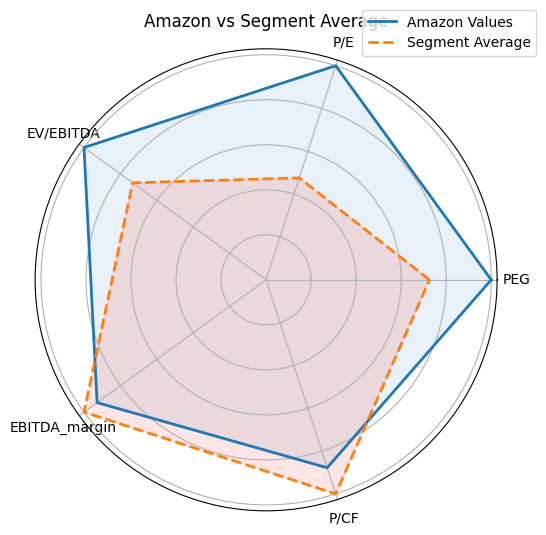

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Actual data (replace with up-to-date values if needed)
amazon_values = {'PEG': 1.75, 'P/E': 45.78, 'EV/EBITDA': 20.81, 'EBITDA_margin': 18.33, 'P/CF': 19.97}
# nvidia_values = {'PEG': 2.03, 'P/E': 68.6, 'EV/EBITDA': 58.24, 'EBITDA_margin': 45.10, 'P/CF': 76.7}
amazon_segment_avg = {'PEG': 1.27, 'P/E': 21.80, 'EV/EBITDA': 15.25, 'EBITDA_margin': 19.75, 'P/CF': 22.75}
# nvidia_segment_avg = {'PEG': 1.22, 'P/E': 20.97, 'EV/EBITDA': 18.15, 'EBITDA_margin': 32.50, 'P/CF': 26.75}

# Normalize values by dividing by the maximum in each category
def normalize_by_category(values, max_values):
    return [v / max_values[k] for k, v in values.items()]

# Max values across all data for normalization
max_values = {k: max(amazon_values[k], amazon_segment_avg[k])
              for k in amazon_values.keys()}

# Normalize company and segment values
normalized_amazon_values = normalize_by_category(amazon_values, max_values)
# normalized_nvidia_values = normalize_by_category(nvidia_values, max_values)
normalized_amazon_avg = normalize_by_category(amazon_segment_avg, max_values)
# normalized_nvidia_avg = normalize_by_category(nvidia_segment_avg, max_values)

# Prepare data for radar chart
def prepare_radar_chart(values, segment_avg, company_name):
    categories = list(amazon_values.keys())
    num_vars = len(categories)

    # Create angles for radar chart
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # Wrap the data for radar chart
    values_wrap = values + values[:1]
    segment_avg_wrap = segment_avg + segment_avg[:1]

    # Create radar chart
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Plot and fill company data
    ax.plot(angles, values_wrap, linewidth=2, label=f"{company_name} Values")
    ax.fill(angles, values_wrap, alpha=0.1)

    # Plot and fill segment average
    ax.plot(angles, segment_avg_wrap, linewidth=2, linestyle='dashed', label="Segment Average")
    ax.fill(angles, segment_avg_wrap, alpha=0.1, color='red')

    # Add labels
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Add title and legend
    plt.title(f'{company_name} vs Segment Average')
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.show()

# Plot for Amazon and NVIDIA
prepare_radar_chart(normalized_amazon_values, normalized_amazon_avg, "Amazon")
# prepare_radar_chart(normalized_nvidia_values, normalized_nvidia_avg, "NVIDIA")


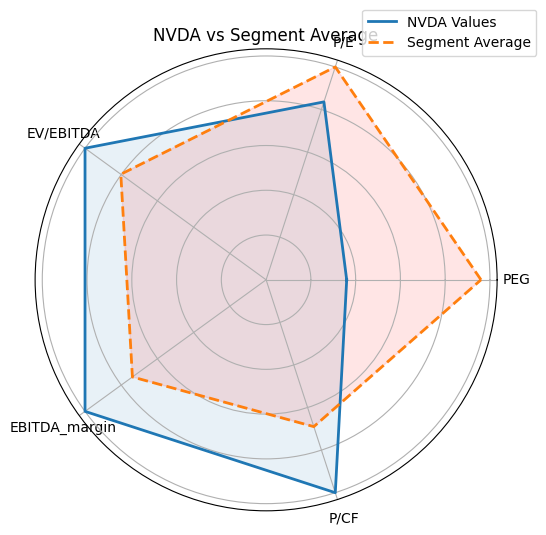

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Actual data (replace with up-to-date values if needed)
amazon_values = {'PEG': 1.75, 'P/E': 45.78, 'EV/EBITDA': 20.81, 'EBITDA_margin': 18.33, 'P/CF': 19.97}
nvidia_values = {'PEG': 0.63, 'P/E': 50.8, 'EV/EBITDA': 38.1, 'EBITDA_margin': 45.1, 'P/CF': 76.7}
# arm_values = {'PEG': 3.14, 'P/E': 206.8, 'EV/EBITDA': 162.6, 'EBITDA_margin': 49, 'P/CF': 412.7}
amazon_segment_avg = {'PEG': 1.27, 'P/E': 21.80, 'EV/EBITDA': 15.25, 'EBITDA_margin': 19.75, 'P/CF': 22.75}
nvidia_segment_avg = {'PEG': 1.22, 'P/E': 20.97, 'EV/EBITDA': 18.15, 'EBITDA_margin': 32.50, 'P/CF': 26.75}
arm_segment_avg = {'PEG': 1.68, 'P/E': 60.78, 'EV/EBITDA': 30.57, 'EBITDA_margin': 33.3, 'P/CF': 52.9}

# Normalize values by dividing by the maximum in each category
def normalize_by_category(values, max_values):
    return [v / max_values[k] for k, v in values.items()]

# Max values across all data for normalization
max_values = {k: max(amazon_values[k], nvidia_values[k], amazon_segment_avg[k], nvidia_segment_avg[k], arm_segment_avg[k])
              for k in amazon_values.keys()}

# Normalize company and segment values
normalized_amazon_values = normalize_by_category(amazon_values, max_values)
normalized_nvidia_values = normalize_by_category(nvidia_values, max_values)
# normalized_arm_values = normalize_by_category(arm_values, max_values)
normalized_amazon_avg = normalize_by_category(amazon_segment_avg, max_values)
normalized_nvidia_avg = normalize_by_category(nvidia_segment_avg, max_values)
normalized_arm_avg = normalize_by_category(arm_segment_avg, max_values)

# Prepare data for radar chart
def prepare_radar_chart(values, segment_avg, company_name):
    categories = list(amazon_values.keys())
    num_vars = len(categories)

    # Create angles for radar chart
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # Wrap the data for radar chart
    values_wrap = values + values[:1]
    segment_avg_wrap = segment_avg + segment_avg[:1]

    # Create radar chart
    fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

    # Plot and fill company data
    ax.plot(angles, values_wrap, linewidth=2, label=f"{company_name} Values")
    ax.fill(angles, values_wrap, alpha=0.1)

    # Plot and fill segment average
    ax.plot(angles, segment_avg_wrap, linewidth=2, linestyle='dashed', label="Segment Average")
    ax.fill(angles, segment_avg_wrap, alpha=0.1, color='red')

    # Add labels
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Add title and legend
    plt.title(f'{company_name} vs Segment Average')
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.show()

# Plot for Amazon and NVIDIA
# prepare_radar_chart(normalized_amazon_values, normalized_amazon_avg, "Amazon")
prepare_radar_chart(normalized_nvidia_values, normalized_arm_avg, "NVDA")


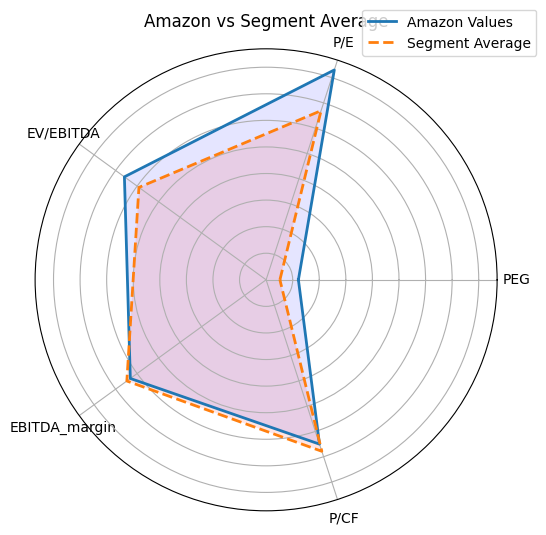

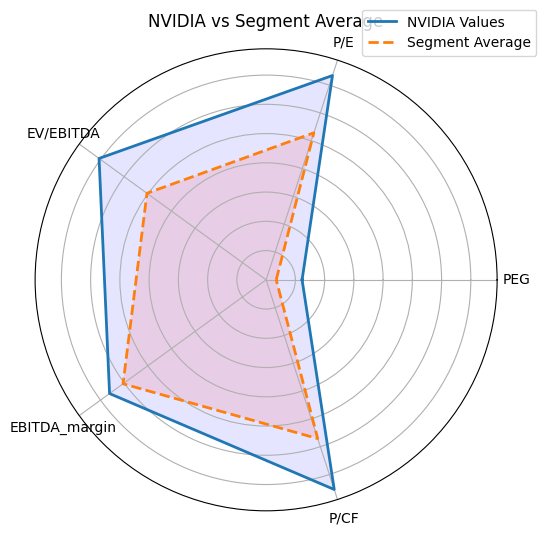

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi, log10

# Sample data (replace with actual current data)
amazon_values = {'PEG': 1.75, 'P/E': 45.78, 'EV/EBITDA': 20.81, 'EBITDA_margin': 18.33, 'P/CF': 19.97}
nvidia_values = {'PEG': 2.03, 'P/E': 68.6, 'EV/EBITDA': 58.24, 'EBITDA_margin': 45.10, 'P/CF': 76.7}
amazon_segment_avg = {'PEG': 1.27, 'P/E': 21.80, 'EV/EBITDA': 15.25, 'EBITDA_margin': 19.75, 'P/CF': 22.75}
nvidia_segment_avg = {'PEG': 1.22, 'P/E': 20.97, 'EV/EBITDA': 18.15, 'EBITDA_margin': 32.50, 'P/CF': 26.75}

# Normalize values using log base 10
def normalize_log(values):
    return {k: log10(v) if v > 0 else 0 for k, v in values.items()}

# Prepare data for radar chart
def prepare_data(values, segment_avg):
    # Apply log normalization
    values_log = normalize_log(values)
    segment_avg_log = normalize_log(segment_avg)

    categories = list(values.keys())
    n_metrics = len(categories)

    # Convert normalized values and segment averages to lists
    values_list = list(values_log.values())
    segment_avg_list = list(segment_avg_log.values())

    # Repeat the first value at the end to close the radar chart
    values_list += values_list[:1]
    segment_avg_list += segment_avg_list[:1]

    # Create angles for each axis
    angles = [n / float(n_metrics) * 2 * pi for n in range(n_metrics)]
    angles += angles[:1]

    return categories, angles, values_list, segment_avg_list

# Function to plot radar chart
def plot_radar_chart(company_name, values, segment_avg):
    categories, angles, values_list, segment_avg_list = prepare_data(values, segment_avg)

    # Initialize radar chart
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Plot data for company and segment average
    ax.plot(angles, values_list, linewidth=2, linestyle='solid', label=f'{company_name} Values')
    ax.fill(angles, values_list, 'b', alpha=0.1)

    ax.plot(angles, segment_avg_list, linewidth=2, linestyle='dashed', label='Segment Average')
    ax.fill(angles, segment_avg_list, 'r', alpha=0.1)

    # Add labels
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Add title and legend
    plt.title(f'{company_name} vs Segment Average')
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    plt.show()

# Plot radar charts for Amazon and NVIDIA
plot_radar_chart("Amazon", amazon_values, amazon_segment_avg)
plot_radar_chart("NVIDIA", nvidia_values, nvidia_segment_avg)


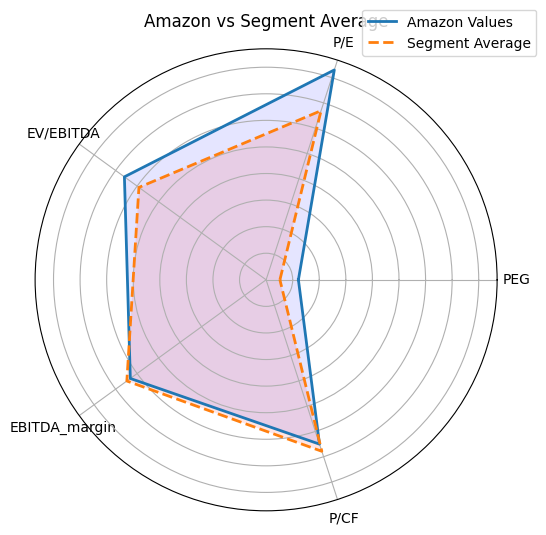

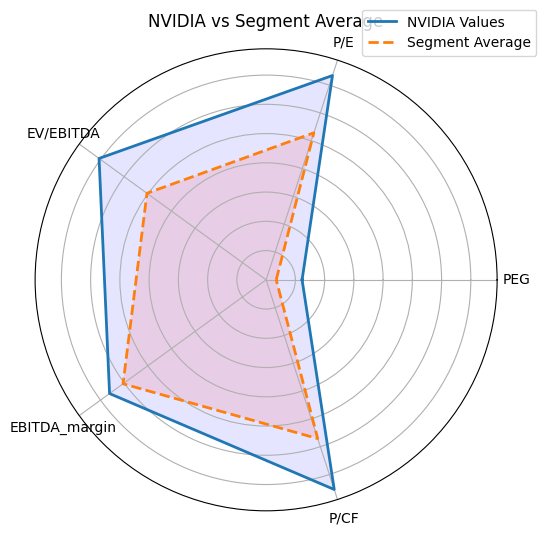

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, log10

class RadarChart:
    def __init__(self, company_name, values, segment_avg):
        """
        Initialize the RadarChart object with company-specific and segment average values.

        Args:
            company_name (str): Name of the company.
            values (dict): Company-specific metrics.
            segment_avg (dict): Segment average metrics.
        """
        self.company_name = company_name
        self.values = values
        self.segment_avg = segment_avg

    @staticmethod
    def normalize_log(values):
        """
        Normalize the values using log base 10.

        Args:
            values (dict): Dictionary of metric values.

        Returns:
            dict: Normalized values.
        """
        return {k: log10(v) if v > 0 else 0 for k, v in values.items()}

    def prepare_data(self):
        """
        Prepare data for the radar chart, including normalization and angle calculations.

        Returns:
            tuple: Categories, angles, normalized company values, normalized segment average values.
        """
        # Apply log normalization
        values_log = self.normalize_log(self.values)
        segment_avg_log = self.normalize_log(self.segment_avg)

        categories = list(self.values.keys())
        n_metrics = len(categories)

        # Convert normalized values and segment averages to lists
        values_list = list(values_log.values())
        segment_avg_list = list(segment_avg_log.values())

        # Repeat the first value at the end to close the radar chart
        values_list += values_list[:1]
        segment_avg_list += segment_avg_list[:1]

        # Create angles for each axis
        angles = [n / float(n_metrics) * 2 * pi for n in range(n_metrics)]
        angles += angles[:1]

        return categories, angles, values_list, segment_avg_list

    def plot(self):
        """
        Plot the radar chart for the company and its segment average.
        """
        categories, angles, values_list, segment_avg_list = self.prepare_data()

        # Initialize radar chart
        fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

        # Plot data for company and segment average
        ax.plot(angles, values_list, linewidth=2, linestyle='solid', label=f'{self.company_name} Values')
        ax.fill(angles, values_list, 'b', alpha=0.1)

        ax.plot(angles, segment_avg_list, linewidth=2, linestyle='dashed', label='Segment Average')
        ax.fill(angles, segment_avg_list, 'r', alpha=0.1)

        # Add labels
        ax.set_yticklabels([])
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories)

        # Add title and legend
        plt.title(f'{self.company_name} vs Segment Average')
        plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

        plt.show()


# Sample data
amazon_values = {'PEG': 1.75, 'P/E': 45.78, 'EV/EBITDA': 20.81, 'EBITDA_margin': 18.33, 'P/CF': 19.97}
nvidia_values = {'PEG': 2.03, 'P/E': 68.6, 'EV/EBITDA': 58.24, 'EBITDA_margin': 45.10, 'P/CF': 76.7}
amazon_segment_avg = {'PEG': 1.27, 'P/E': 21.80, 'EV/EBITDA': 15.25, 'EBITDA_margin': 19.75, 'P/CF': 22.75}
nvidia_segment_avg = {'PEG': 1.22, 'P/E': 20.97, 'EV/EBITDA': 18.15, 'EBITDA_margin': 32.50, 'P/CF': 26.75}

# Create RadarChart objects and plot
amazon_chart = RadarChart("Amazon", amazon_values, amazon_segment_avg)
amazon_chart.plot()

nvidia_chart = RadarChart("NVIDIA", nvidia_values, nvidia_segment_avg)
nvidia_chart.plot()


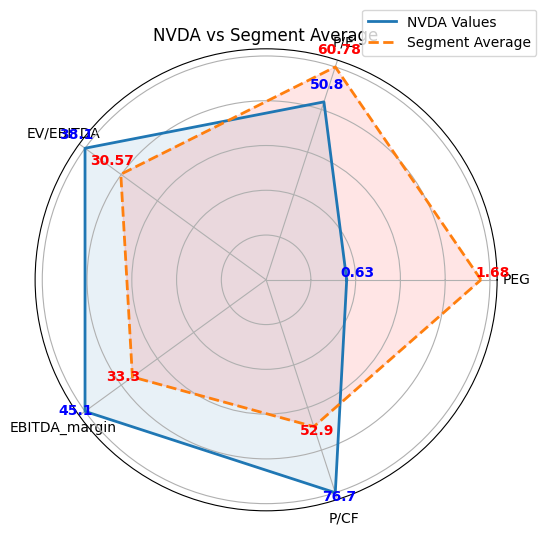

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Actual data
amazon_values = {'PEG': 1.75, 'P/E': 45.78, 'EV/EBITDA': 20.81, 'EBITDA_margin': 18.33, 'P/CF': 19.97}
nvidia_values = {'PEG': 0.63, 'P/E': 50.8, 'EV/EBITDA': 38.1, 'EBITDA_margin': 45.1, 'P/CF': 76.7}
amazon_segment_avg = {'PEG': 1.27, 'P/E': 21.80, 'EV/EBITDA': 15.25, 'EBITDA_margin': 19.75, 'P/CF': 22.75}
nvidia_segment_avg = {'PEG': 1.22, 'P/E': 20.97, 'EV/EBITDA': 18.15, 'EBITDA_margin': 32.50, 'P/CF': 26.75}
arm_segment_avg = {'PEG': 1.68, 'P/E': 60.78, 'EV/EBITDA': 30.57, 'EBITDA_margin': 33.3, 'P/CF': 52.9}

# Normalize values by dividing by the maximum in each category
def normalize_by_category(values, max_values):
    return [v / max_values[k] for k, v in values.items()]

# Max values across all data for normalization
max_values = {k: max(amazon_values.get(k,0), nvidia_values.get(k,0),
                      amazon_segment_avg.get(k,0), nvidia_segment_avg.get(k,0),
                      arm_segment_avg.get(k,0)) for k in amazon_values.keys()}

# Normalize company and segment values
normalized_amazon_values = normalize_by_category(amazon_values, max_values)
normalized_nvidia_values = normalize_by_category(nvidia_values, max_values)
normalized_amazon_avg = normalize_by_category(amazon_segment_avg, max_values)
normalized_nvidia_avg = normalize_by_category(nvidia_segment_avg, max_values)
normalized_arm_avg = normalize_by_category(arm_segment_avg, max_values)

# Prepare data for radar chart
def prepare_radar_chart(values, segment_avg, company_values, segment_values, company_name):
    categories = list(company_values.keys())
    num_vars = len(categories)

    # Create angles for radar chart
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # Wrap the data for radar chart
    values_wrap = values + values[:1]
    segment_avg_wrap = segment_avg + segment_avg[:1]

    # Create radar chart
    fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

    # Plot and fill company data
    ax.plot(angles, values_wrap, linewidth=2, label=f"{company_name} Values")
    ax.fill(angles, values_wrap, alpha=0.1)

    # Plot and fill segment average
    ax.plot(angles, segment_avg_wrap, linewidth=2, linestyle='dashed', label="Segment Average")
    ax.fill(angles, segment_avg_wrap, alpha=0.1, color='red')

    # Add labels
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Add actual values on the chart
    for i, angle in enumerate(angles[:-1]):
        ax.text(angle, values_wrap[i] + 0.05, f"{company_values[categories[i]]}", color='blue', fontsize=10, fontweight='bold', ha='center', va='bottom')
        ax.text(angle, segment_avg_wrap[i] + 0.05, f"{segment_values[categories[i]]}", color='red', fontsize=10, fontweight='bold', ha='center', va='bottom')

    # Add title and legend
    plt.title(f'{company_name} vs Segment Average')
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.show()

# Plot NVDA vs ARM Segment
prepare_radar_chart(
    normalized_nvidia_values,
    normalized_arm_avg,
    nvidia_values,
    arm_segment_avg,
    "NVDA"
)


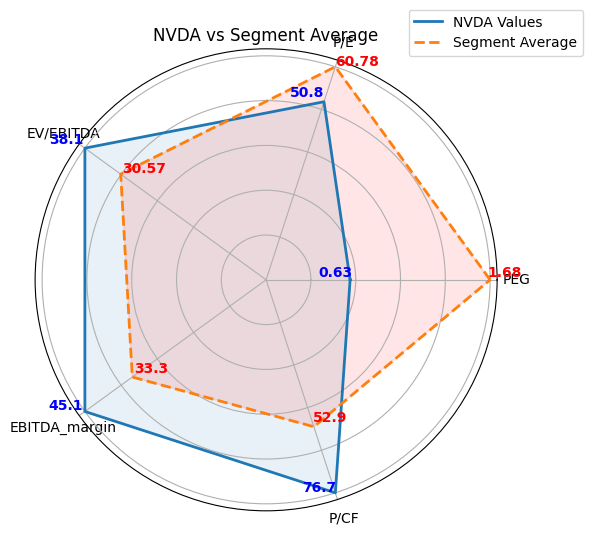

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Actual data
amazon_values = {'PEG': 1.75, 'P/E': 45.78, 'EV/EBITDA': 20.81, 'EBITDA_margin': 18.33, 'P/CF': 19.97}
nvidia_values = {'PEG': 0.63, 'P/E': 50.8, 'EV/EBITDA': 38.1, 'EBITDA_margin': 45.1, 'P/CF': 76.7}
arm_segment_avg = {'PEG': 1.68, 'P/E': 60.78, 'EV/EBITDA': 30.57, 'EBITDA_margin': 33.3, 'P/CF': 52.9}

# Segment averages
normalized_nvidia_values = [nvidia_values[k]/max(nvidia_values[k], arm_segment_avg[k]) for k in nvidia_values.keys()]
normalized_arm_avg = [arm_segment_avg[k]/max(nvidia_values[k], arm_segment_avg[k]) for k in arm_segment_avg.keys()]

# Function to plot radar chart with adjusted label positions
def prepare_radar_chart(values, segment_avg, company_values, segment_values, company_name):
    categories = list(company_values.keys())
    num_vars = len(categories)

    # Create angles for radar chart
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # Wrap the data
    values_wrap = values + values[:1]
    segment_avg_wrap = segment_avg + segment_avg[:1]

    # Create radar chart
    fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

    # Plot company and segment
    ax.plot(angles, values_wrap, linewidth=2, label=f"{company_name} Values")
    ax.fill(angles, values_wrap, alpha=0.1)
    ax.plot(angles, segment_avg_wrap, linewidth=2, linestyle='dashed', label="Segment Average")
    ax.fill(angles, segment_avg_wrap, alpha=0.1, color='red')

    # Add labels
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Add actual values with radial offset to avoid overlap
    offset = 0.01  # distance from point
    for i, angle in enumerate(angles[:-1]):
        # NVDA above the point
        ax.text(angle, values_wrap[i] + offset, f"{company_values[categories[i]]}",
                color='blue', fontsize=10, fontweight='bold', ha='right', va='bottom')
        # ARM below the point
        ax.text(angle, segment_avg_wrap[i] - offset, f"{segment_values[categories[i]]}",
                color='red', fontsize=10, fontweight='bold', ha='left', va='bottom')

    plt.title(f'{company_name} vs Segment Average')
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
    plt.show()

# Plot NVDA vs ARM
prepare_radar_chart(
    normalized_nvidia_values,
    normalized_arm_avg,
    nvidia_values,
    arm_segment_avg,
    "NVDA"
)


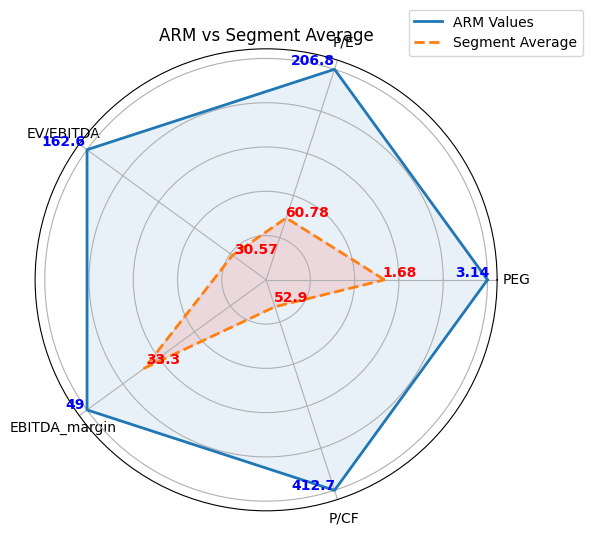

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Actual data
amazon_values = {'PEG': 1.75, 'P/E': 45.78, 'EV/EBITDA': 20.81, 'EBITDA_margin': 18.33, 'P/CF': 19.97}
nvidia_values = {'PEG': 0.63, 'P/E': 50.8, 'EV/EBITDA': 38.1, 'EBITDA_margin': 45.1, 'P/CF': 76.7}
qualcommn_values = {'PEG': 1.5, 'P/E': 16.5, 'EV/EBITDA': 12.8, 'EBITDA_margin': 31.4, 'P/CF': 15.8}
arm_values = {'PEG': 3.14, 'P/E': 208.76, 'EV/EBITDA': 162.6, 'EBITDA_margin': 25.30, 'P/CF': 216.81}
arm_segment_avg = {'PEG': 1.68, 'P/E': 60.78, 'EV/EBITDA': 30.57, 'EBITDA_margin': 33.3, 'P/CF': 52.9}

# Segment averages
normalized_arm_values = [arm_values[k]/max(arm_values[k], arm_segment_avg[k]) for k in arm_values.keys()]
normalized_arm_avg = [arm_segment_avg[k]/max(arm_values[k], arm_segment_avg[k]) for k in arm_segment_avg.keys()]

# Function to plot radar chart with adjusted label positions
def prepare_radar_chart(values, segment_avg, company_values, segment_values, company_name):
    categories = list(company_values.keys())
    num_vars = len(categories)

    # Create angles for radar chart
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # Wrap the data
    values_wrap = values + values[:1]
    segment_avg_wrap = segment_avg + segment_avg[:1]

    # Create radar chart
    fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

    # Plot company and segment
    ax.plot(angles, values_wrap, linewidth=2, label=f"{company_name} Values")
    ax.fill(angles, values_wrap, alpha=0.1)
    ax.plot(angles, segment_avg_wrap, linewidth=2, linestyle='dashed', label="Segment Average")
    ax.fill(angles, segment_avg_wrap, alpha=0.1, color='red')

    # Add labels
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Add actual values with radial offset to avoid overlap
    offset = 0.01  # distance from point
    for i, angle in enumerate(angles[:-1]):
        # NVDA above the point
        ax.text(angle, values_wrap[i] + offset, f"{company_values[categories[i]]}",
                color='blue', fontsize=10, fontweight='bold', ha='right', va='bottom')
        # ARM below the point
        ax.text(angle, segment_avg_wrap[i] - offset, f"{segment_values[categories[i]]}",
                color='red', fontsize=10, fontweight='bold', ha='left', va='bottom')

    plt.title(f'{company_name} vs Segment Average')
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
    plt.show()

# Plot NVDA vs ARM
prepare_radar_chart(
    normalized_arm_values,
    normalized_arm_avg,
    arm_values,
    arm_segment_avg,
    "ARM"
)


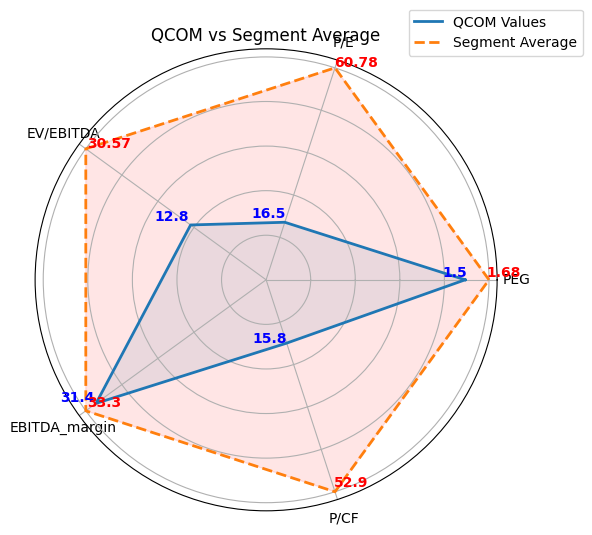

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Actual data
amazon_values = {'PEG': 1.75, 'P/E': 45.78, 'EV/EBITDA': 20.81, 'EBITDA_margin': 18.33, 'P/CF': 19.97}
nvidia_values = {'PEG': 0.63, 'P/E': 50.8, 'EV/EBITDA': 38.1, 'EBITDA_margin': 45.1, 'P/CF': 76.7}
qualcommn_values = {'PEG': 1.5, 'P/E': 16.5, 'EV/EBITDA': 12.8, 'EBITDA_margin': 31.4, 'P/CF': 15.8}
arm_values = {'PEG': 3.14, 'P/E': 206.8, 'EV/EBITDA': 162.6, 'EBITDA_margin': 49, 'P/CF': 412.7}
arm_segment_avg = {'PEG': 1.68, 'P/E': 60.78, 'EV/EBITDA': 30.57, 'EBITDA_margin': 33.3, 'P/CF': 52.9}

# Segment averages
normalized_qcom_values = [qualcommn_values[k]/max(qualcommn_values[k], arm_segment_avg[k]) for k in qualcommn_values.keys()]
normalized_arm_avg = [arm_segment_avg[k]/max(qualcommn_values[k], arm_segment_avg[k]) for k in arm_segment_avg.keys()]

# Function to plot radar chart with adjusted label positions
def prepare_radar_chart(values, segment_avg, company_values, segment_values, company_name):
    categories = list(company_values.keys())
    num_vars = len(categories)

    # Create angles for radar chart
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # Wrap the data
    values_wrap = values + values[:1]
    segment_avg_wrap = segment_avg + segment_avg[:1]

    # Create radar chart
    fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

    # Plot company and segment
    ax.plot(angles, values_wrap, linewidth=2, label=f"{company_name} Values")
    ax.fill(angles, values_wrap, alpha=0.1)
    ax.plot(angles, segment_avg_wrap, linewidth=2, linestyle='dashed', label="Segment Average")
    ax.fill(angles, segment_avg_wrap, alpha=0.1, color='red')

    # Add labels
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Add actual values with radial offset to avoid overlap
    offset = 0.01  # distance from point
    for i, angle in enumerate(angles[:-1]):
        # NVDA above the point
        ax.text(angle, values_wrap[i] + offset, f"{company_values[categories[i]]}",
                color='blue', fontsize=10, fontweight='bold', ha='right', va='bottom')
        # ARM below the point
        ax.text(angle, segment_avg_wrap[i] - offset, f"{segment_values[categories[i]]}",
                color='red', fontsize=10, fontweight='bold', ha='left', va='bottom')

    plt.title(f'{company_name} vs Segment Average')
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
    plt.show()

# Plot NVDA vs ARM
prepare_radar_chart(
    normalized_qcom_values,
    normalized_arm_avg,
    qualcommn_values,
    arm_segment_avg,
    "QCOM"
)


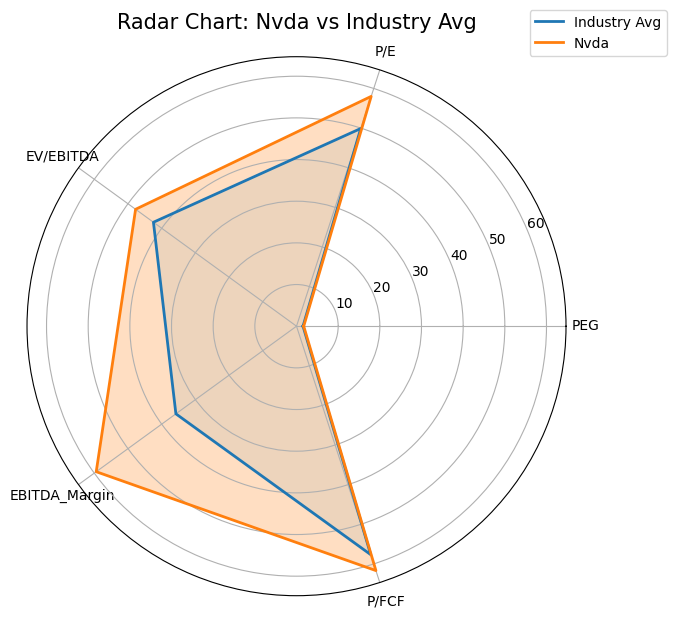

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# Step 1: Create dataset
# ----------------------------
data = {
    "Ticker": ["Arm", "QCOM", "Txn", "Mu", "Adi", "Amd", "Intc", "Mrvl", "Nxpi",
               "Mchp", "Mpwr", "Nvda", "Avgo", "tpe.2330", "tae.2254", "hkse.000660"],
    "PEG": [2.49, 1.80, 2.21, 0.13, 0, 0.77, 0.50, 1.52, 1.46, 5.7, 2.08, 1.73, 1.38, 1.18, 1.56, 0.51],
    "P/E": [208.76, 15.10, 37.65, 20.98, 12.34, 97.82, 88.08, 22.15, 28.21, 31.39, 21.92, 58.00, 107.38, 21.00, 21.14, 6.38],
    "EV/EBITDA": [148.95, 11.86, 24.64, 8.37, 5.61, 46.99, 123.21, 62.55, 16.74, 49.83, 55.32, 47.74, 47.67, 11.57, 14.27, 3.84],
    "EBITDA_Margin": [23.37, 31.66, 45.46, 46.81, 50.49, 18.21, -0.33, 16.20, 32.73, 21.22, 27.23, 59.42, 52.55, 69.86, 21.90, 55.76],
    "P/FCF": [216.81, 14.82, 125.68, 125.68, 5.87, 65.98, 0, 45.08, 30.52, 50.61, 57.31, 61.68, 62.17, 41.50, 14.65, 4.14]
}

df = pd.DataFrame(data)

# ----------------------------
# Step 2: Compute Industry Average
# ----------------------------
industry_avg = df.drop(columns="Ticker").mean()

# ----------------------------
# Step 3: Radar Chart Function
# ----------------------------
def plot_radar(ticker):
    categories = list(industry_avg.index)
    N = len(categories)

    # Get company data
    company_data = df[df["Ticker"] == ticker].drop(columns="Ticker").values.flatten().tolist()
    industry_data = industry_avg.values.flatten().tolist()

    # Close the radar chart
    company_data += company_data[:1]
    industry_data += industry_data[:1]

    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(7,7), subplot_kw=dict(polar=True))

    # Plot industry average
    ax.plot(angles, industry_data, linewidth=2, linestyle="solid", label="Industry Avg")
    ax.fill(angles, industry_data, alpha=0.1)

    # Plot company data
    ax.plot(angles, company_data, linewidth=2, linestyle="solid", label=ticker)
    ax.fill(angles, company_data, alpha=0.25)

    # Add labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_title(f"Radar Chart: {ticker} vs Industry Avg", size=15, pad=20)
    ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))

    plt.show()

# ----------------------------
# Step 4: Example Usage
# ----------------------------
plot_radar("Nvda")   # Replace with any ticker, e.g. "Arm", "QCOM", "tpe.2330"


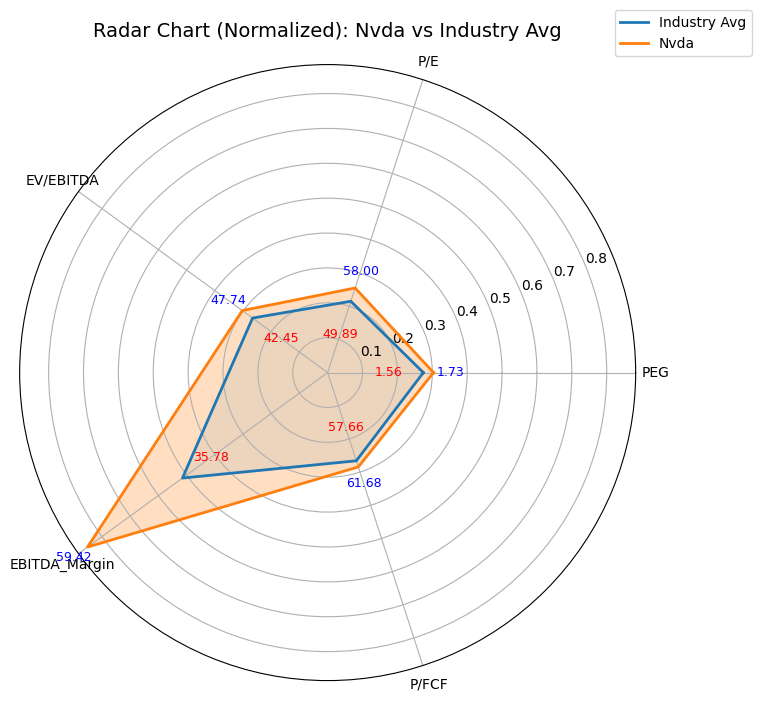

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# Step 1: Create dataset
# ----------------------------
data = {
    "Ticker": ["Arm", "QCOM", "Txn", "Mu", "Adi", "Amd", "Intc", "Mrvl", "Nxpi",
               "Mchp", "Mpwr", "Nvda", "Avgo", "tpe.2330", "tae.2254", "hkse.000660"],
    "PEG": [2.49, 1.80, 2.21, 0.13, 0, 0.77, 0.50, 1.52, 1.46, 5.7, 2.08, 1.73, 1.38, 1.18, 1.56, 0.51],
    "P/E": [208.76, 15.10, 37.65, 20.98, 12.34, 97.82, 88.08, 22.15, 28.21, 31.39, 21.92, 58.00, 107.38, 21.00, 21.14, 6.38],
    "EV/EBITDA": [148.95, 11.86, 24.64, 8.37, 5.61, 46.99, 123.21, 62.55, 16.74, 49.83, 55.32, 47.74, 47.67, 11.57, 14.27, 3.84],
    "EBITDA_Margin": [23.37, 31.66, 45.46, 46.81, 50.49, 18.21, -0.33, 16.20, 32.73, 21.22, 27.23, 59.42, 52.55, 69.86, 21.90, 55.76],
    "P/FCF": [216.81, 14.82, 125.68, 125.68, 5.87, 65.98, 0, 45.08, 30.52, 50.61, 57.31, 61.68, 62.17, 41.50, 14.65, 4.14]
}

df = pd.DataFrame(data)

# ----------------------------
# Step 2: Normalize values (Min-Max scaling)
# ----------------------------
df_norm = df.copy()
for col in df.columns[1:]:
    min_val, max_val = df[col].min(), df[col].max()
    df_norm[col] = (df[col] - min_val) / (max_val - min_val)

# Industry average (normalized + original)
industry_avg_norm = df_norm.drop(columns="Ticker").mean()
industry_avg_raw = df.drop(columns="Ticker").mean()

# ----------------------------
# Step 3: Radar Chart Function
# ----------------------------
def plot_radar(ticker):
    categories = list(industry_avg_norm.index)
    N = len(categories)

    # Company data (normalized + raw)
    company_data_norm = df_norm[df_norm["Ticker"] == ticker].drop(columns="Ticker").values.flatten().tolist()
    company_data_raw = df[df["Ticker"] == ticker].drop(columns="Ticker").values.flatten().tolist()

    industry_data_norm = industry_avg_norm.values.flatten().tolist()
    industry_data_raw = industry_avg_raw.values.flatten().tolist()

    # Close the radar chart (make circular)
    company_data_norm += company_data_norm[:1]
    industry_data_norm += industry_data_norm[:1]
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))

    # Plot industry avg
    ax.plot(angles, industry_data_norm, linewidth=2, linestyle="solid", label="Industry Avg")
    ax.fill(angles, industry_data_norm, alpha=0.1)

    # Plot company
    ax.plot(angles, company_data_norm, linewidth=2, linestyle="solid", label=ticker)
    ax.fill(angles, company_data_norm, alpha=0.25)

    # Labels for categories
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Print actual values on edges
    for i, angle in enumerate(angles[:-1]):
        # Company value
        ax.text(angle, company_data_norm[i] + 0.05, f"{company_data_raw[i]:.2f}",
                ha="center", va="center", fontsize=9, color="blue")
        # Industry value
        ax.text(angle, industry_data_norm[i] - 0.1, f"{industry_data_raw[i]:.2f}",
                ha="center", va="center", fontsize=9, color="red")

    ax.set_title(f"Radar Chart (Normalized): {ticker} vs Industry Avg", size=14, pad=20)
    ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))

    plt.show()

# ----------------------------
# Step 4: Example Usage
# ----------------------------
plot_radar("Nvda")   # Replace with any ticker


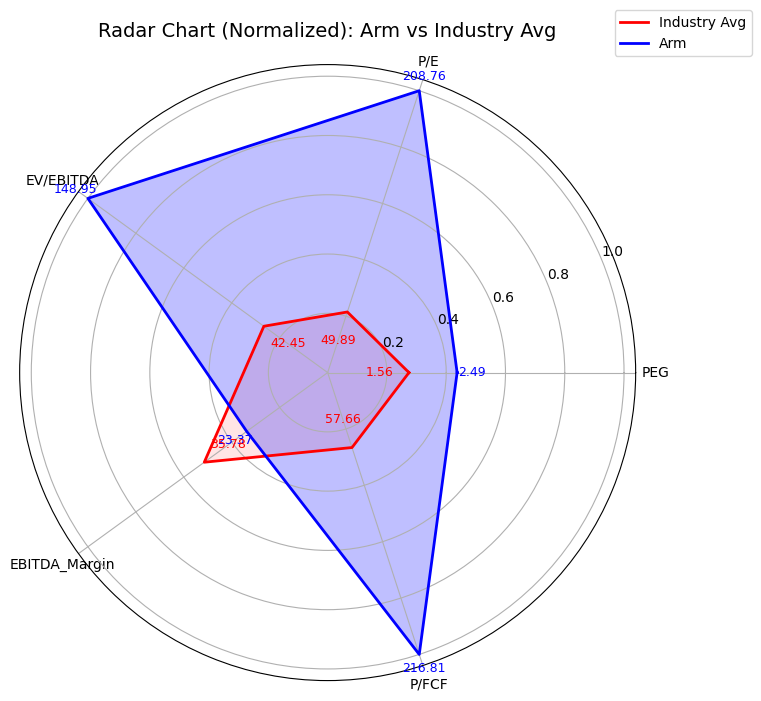

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# Step 1: Create dataset
# ----------------------------
data = {
    "Ticker": ["Arm", "QCOM", "Txn", "Mu", "Adi", "Amd", "Intc", "Mrvl", "Nxpi",
               "Mchp", "Mpwr", "Nvda", "Avgo", "tpe.2330", "tae.2254", "hkse.000660"],
    "PEG": [2.49, 1.80, 2.21, 0.13, 0, 0.77, 0.50, 1.52, 1.46, 5.7, 2.08, 1.73, 1.38, 1.18, 1.56, 0.51],
    "P/E": [208.76, 15.10, 37.65, 20.98, 12.34, 97.82, 88.08, 22.15, 28.21, 31.39, 21.92, 58.00, 107.38, 21.00, 21.14, 6.38],
    "EV/EBITDA": [148.95, 11.86, 24.64, 8.37, 5.61, 46.99, 123.21, 62.55, 16.74, 49.83, 55.32, 47.74, 47.67, 11.57, 14.27, 3.84],
    "EBITDA_Margin": [23.37, 31.66, 45.46, 46.81, 50.49, 18.21, -0.33, 16.20, 32.73, 21.22, 27.23, 59.42, 52.55, 69.86, 21.90, 55.76],
    "P/FCF": [216.81, 14.82, 125.68, 125.68, 5.87, 65.98, 0, 45.08, 30.52, 50.61, 57.31, 61.68, 62.17, 41.50, 14.65, 4.14]
}

df = pd.DataFrame(data)

# ----------------------------
# Step 2: Normalize values (Min-Max scaling)
# ----------------------------
df_norm = df.copy()
for col in df.columns[1:]:
    min_val, max_val = df[col].min(), df[col].max()
    df_norm[col] = (df[col] - min_val) / (max_val - min_val)

# Industry average (normalized + original)
industry_avg_norm = df_norm.drop(columns="Ticker").mean()
industry_avg_raw = df.drop(columns="Ticker").mean()

# ----------------------------
# Step 3: Radar Chart Function
# ----------------------------
def plot_radar(ticker):
    categories = list(industry_avg_norm.index)
    N = len(categories)

    # Company data (normalized + raw)
    company_data_norm = df_norm[df_norm["Ticker"] == ticker].drop(columns="Ticker").values.flatten().tolist()
    company_data_raw = df[df["Ticker"] == ticker].drop(columns="Ticker").values.flatten().tolist()

    industry_data_norm = industry_avg_norm.values.flatten().tolist()
    industry_data_raw = industry_avg_raw.values.flatten().tolist()

    # Close the radar chart (make circular)
    company_data_norm += company_data_norm[:1]
    industry_data_norm += industry_data_norm[:1]
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))

    # Plot industry avg (RED)
    ax.plot(angles, industry_data_norm, linewidth=2, linestyle="solid", color="red", label="Industry Avg")
    ax.fill(angles, industry_data_norm, color="red", alpha=0.1)

    # Plot company (BLUE)
    ax.plot(angles, company_data_norm, linewidth=2, linestyle="solid", color="blue", label=ticker)
    ax.fill(angles, company_data_norm, color="blue", alpha=0.25)

    # Labels for categories
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Print actual values on edges
    for i, angle in enumerate(angles[:-1]):
        # Company value (Blue)
        ax.text(angle, company_data_norm[i] + 0.05, f"{company_data_raw[i]:.2f}",
                ha="center", va="center", fontsize=9, color="blue")
        # Industry value (Red)
        ax.text(angle, industry_data_norm[i] - 0.1, f"{industry_data_raw[i]:.2f}",
                ha="center", va="center", fontsize=9, color="red")

    ax.set_title(f"Radar Chart (Normalized): {ticker} vs Industry Avg", size=14, pad=20)
    ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))

    plt.show()

# ----------------------------
# Step 4: Example Usage
# ----------------------------
plot_radar("Arm")   # Replace with any ticker


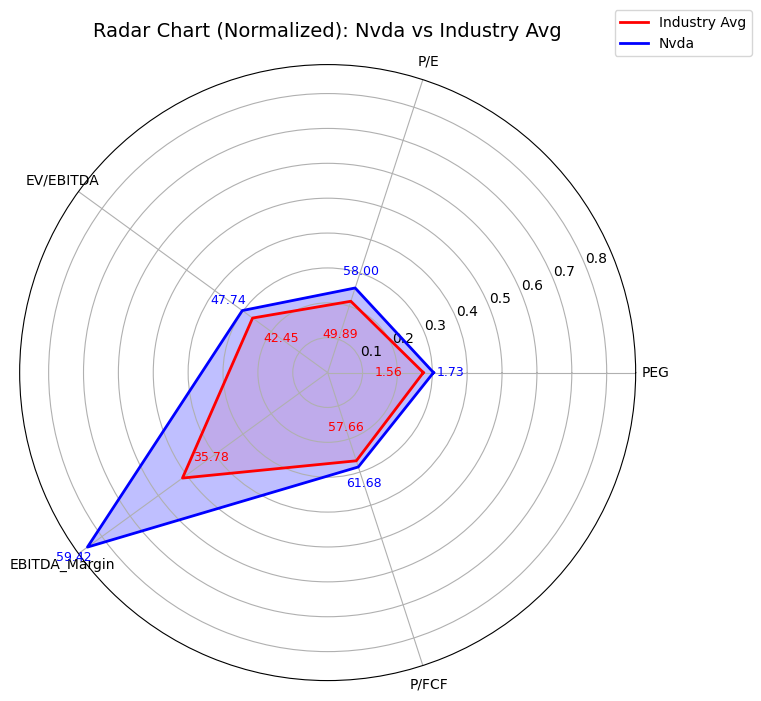

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# Step 1: Create dataset
# ----------------------------
data = {
    "Ticker": ["Arm", "QCOM", "Txn", "Mu", "Adi", "Amd", "Intc", "Mrvl", "Nxpi",
               "Mchp", "Mpwr", "Nvda", "Avgo", "tpe.2330", "tae.2254", "hkse.000660"],
    "PEG": [2.49, 1.80, 2.21, 0.13, 0, 0.77, 0.50, 1.52, 1.46, 5.7, 2.08, 1.73, 1.38, 1.18, 1.56, 0.51],
    "P/E": [208.76, 15.10, 37.65, 20.98, 12.34, 97.82, 88.08, 22.15, 28.21, 31.39, 21.92, 58.00, 107.38, 21.00, 21.14, 6.38],
    "EV/EBITDA": [148.95, 11.86, 24.64, 8.37, 5.61, 46.99, 123.21, 62.55, 16.74, 49.83, 55.32, 47.74, 47.67, 11.57, 14.27, 3.84],
    "EBITDA_Margin": [23.37, 31.66, 45.46, 46.81, 50.49, 18.21, -0.33, 16.20, 32.73, 21.22, 27.23, 59.42, 52.55, 69.86, 21.90, 55.76],
    "P/FCF": [216.81, 14.82, 125.68, 125.68, 5.87, 65.98, 0, 45.08, 30.52, 50.61, 57.31, 61.68, 62.17, 41.50, 14.65, 4.14]
}

df = pd.DataFrame(data)

# ----------------------------
# Step 2: Normalize values (Min-Max scaling)
# ----------------------------
df_norm = df.copy()
for col in df.columns[1:]:
    min_val, max_val = df[col].min(), df[col].max()
    df_norm[col] = (df[col] - min_val) / (max_val - min_val)

# Industry average (normalized + original)
industry_avg_norm = df_norm.drop(columns="Ticker").mean()
industry_avg_raw = df.drop(columns="Ticker").mean()

# ----------------------------
# Step 3: Radar Chart Function
# ----------------------------
def plot_radar(ticker):
    categories = list(industry_avg_norm.index)
    N = len(categories)

    # Company data (normalized + raw)
    company_data_norm = df_norm[df_norm["Ticker"] == ticker].drop(columns="Ticker").values.flatten().tolist()
    company_data_raw = df[df["Ticker"] == ticker].drop(columns="Ticker").values.flatten().tolist()

    industry_data_norm = industry_avg_norm.values.flatten().tolist()
    industry_data_raw = industry_avg_raw.values.flatten().tolist()

    # Close the radar chart (make circular)
    company_data_norm += company_data_norm[:1]
    industry_data_norm += industry_data_norm[:1]
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))

    # Plot industry avg (RED)
    ax.plot(angles, industry_data_norm, linewidth=2, linestyle="solid", color="red", label="Industry Avg")
    ax.fill(angles, industry_data_norm, color="red", alpha=0.1)

    # Plot company (BLUE)
    ax.plot(angles, company_data_norm, linewidth=2, linestyle="solid", color="blue", label=ticker)
    ax.fill(angles, company_data_norm, color="blue", alpha=0.25)

    # Labels for categories
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Print actual values on edges
    for i, angle in enumerate(angles[:-1]):
        # Company value (Blue)
        ax.text(angle, company_data_norm[i] + 0.05, f"{company_data_raw[i]:.2f}",
                ha="center", va="center", fontsize=9, color="blue")
        # Industry value (Red)
        ax.text(angle, industry_data_norm[i] - 0.1, f"{industry_data_raw[i]:.2f}",
                ha="center", va="center", fontsize=9, color="red")

    ax.set_title(f"Radar Chart (Normalized): {ticker} vs Industry Avg", size=14, pad=20)
    ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))

    plt.show()

# ----------------------------
# Step 4: Example Usage
# ----------------------------
plot_radar("Nvda")   # Replace with any ticker


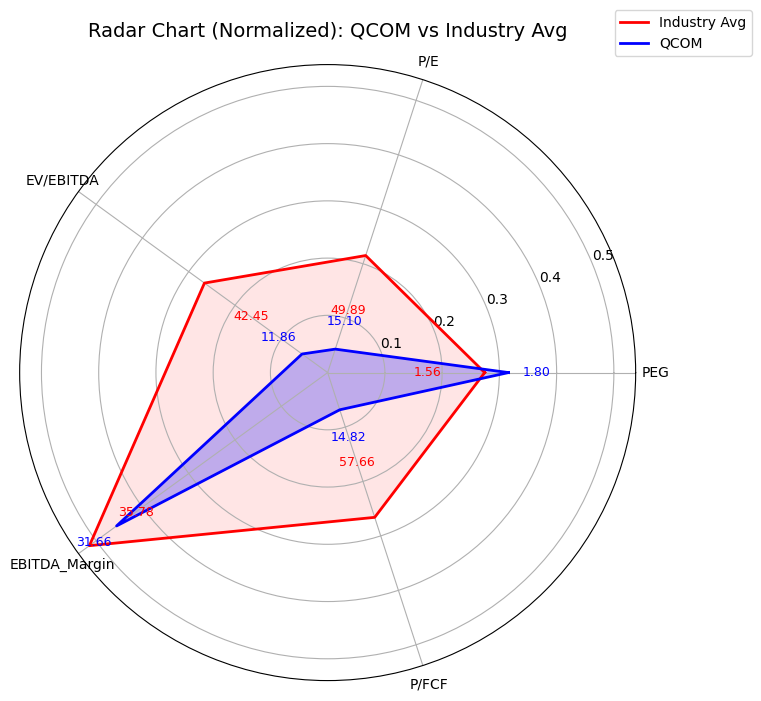

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# Step 1: Create dataset
# ----------------------------
data = {
    "Ticker": ["Arm", "QCOM", "Txn", "Mu", "Adi", "Amd", "Intc", "Mrvl", "Nxpi",
               "Mchp", "Mpwr", "Nvda", "Avgo", "tpe.2330", "tae.2254", "hkse.000660"],
    "PEG": [2.49, 1.80, 2.21, 0.13, 0, 0.77, 0.50, 1.52, 1.46, 5.7, 2.08, 1.73, 1.38, 1.18, 1.56, 0.51],
    "P/E": [208.76, 15.10, 37.65, 20.98, 12.34, 97.82, 88.08, 22.15, 28.21, 31.39, 21.92, 58.00, 107.38, 21.00, 21.14, 6.38],
    "EV/EBITDA": [148.95, 11.86, 24.64, 8.37, 5.61, 46.99, 123.21, 62.55, 16.74, 49.83, 55.32, 47.74, 47.67, 11.57, 14.27, 3.84],
    "EBITDA_Margin": [23.37, 31.66, 45.46, 46.81, 50.49, 18.21, -0.33, 16.20, 32.73, 21.22, 27.23, 59.42, 52.55, 69.86, 21.90, 55.76],
    "P/FCF": [216.81, 14.82, 125.68, 125.68, 5.87, 65.98, 0, 45.08, 30.52, 50.61, 57.31, 61.68, 62.17, 41.50, 14.65, 4.14]
}

df = pd.DataFrame(data)

# ----------------------------
# Step 2: Normalize values (Min-Max scaling)
# ----------------------------
df_norm = df.copy()
for col in df.columns[1:]:
    min_val, max_val = df[col].min(), df[col].max()
    df_norm[col] = (df[col] - min_val) / (max_val - min_val)

# Industry average (normalized + original)
industry_avg_norm = df_norm.drop(columns="Ticker").mean()
industry_avg_raw = df.drop(columns="Ticker").mean()

# ----------------------------
# Step 3: Radar Chart Function
# ----------------------------
def plot_radar(ticker):
    categories = list(industry_avg_norm.index)
    N = len(categories)

    # Company data (normalized + raw)
    company_data_norm = df_norm[df_norm["Ticker"] == ticker].drop(columns="Ticker").values.flatten().tolist()
    company_data_raw = df[df["Ticker"] == ticker].drop(columns="Ticker").values.flatten().tolist()

    industry_data_norm = industry_avg_norm.values.flatten().tolist()
    industry_data_raw = industry_avg_raw.values.flatten().tolist()

    # Close the radar chart (make circular)
    company_data_norm += company_data_norm[:1]
    industry_data_norm += industry_data_norm[:1]
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))

    # Plot industry avg (RED)
    ax.plot(angles, industry_data_norm, linewidth=2, linestyle="solid", color="red", label="Industry Avg")
    ax.fill(angles, industry_data_norm, color="red", alpha=0.1)

    # Plot company (BLUE)
    ax.plot(angles, company_data_norm, linewidth=2, linestyle="solid", color="blue", label=ticker)
    ax.fill(angles, company_data_norm, color="blue", alpha=0.25)

    # Labels for categories
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Print actual values on edges
    for i, angle in enumerate(angles[:-1]):
        # Company value (Blue)
        ax.text(angle, company_data_norm[i] + 0.05, f"{company_data_raw[i]:.2f}",
                ha="center", va="center", fontsize=9, color="blue")
        # Industry value (Red)
        ax.text(angle, industry_data_norm[i] - 0.1, f"{industry_data_raw[i]:.2f}",
                ha="center", va="center", fontsize=9, color="red")

    ax.set_title(f"Radar Chart (Normalized): {ticker} vs Industry Avg", size=14, pad=20)
    ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))

    plt.show()

# ----------------------------
# Step 4: Example Usage
# ----------------------------
plot_radar("QCOM")   # Replace with any ticker


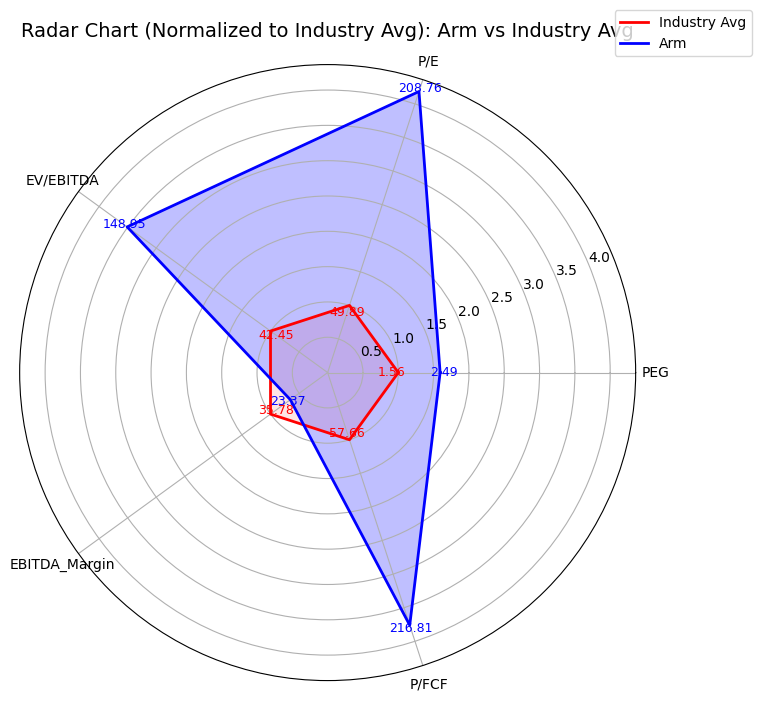

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# Step 1: Create dataset
# ----------------------------
data = {
    "Ticker": ["Arm", "QCOM", "Txn", "Mu", "Adi", "Amd", "Intc", "Mrvl", "Nxpi",
               "Mchp", "Mpwr", "Nvda", "Avgo", "tpe.2330", "tae.2254", "hkse.000660"],
    "PEG": [2.49, 1.80, 2.21, 0.13, 0, 0.77, 0.50, 1.52, 1.46, 5.7, 2.08, 1.73, 1.38, 1.18, 1.56, 0.51],
    "P/E": [208.76, 15.10, 37.65, 20.98, 12.34, 97.82, 88.08, 22.15, 28.21, 31.39, 21.92, 58.00, 107.38, 21.00, 21.14, 6.38],
    "EV/EBITDA": [148.95, 11.86, 24.64, 8.37, 5.61, 46.99, 123.21, 62.55, 16.74, 49.83, 55.32, 47.74, 47.67, 11.57, 14.27, 3.84],
    "EBITDA_Margin": [23.37, 31.66, 45.46, 46.81, 50.49, 18.21, -0.33, 16.20, 32.73, 21.22, 27.23, 59.42, 52.55, 69.86, 21.90, 55.76],
    "P/FCF": [216.81, 14.82, 125.68, 125.68, 5.87, 65.98, 0, 45.08, 30.52, 50.61, 57.31, 61.68, 62.17, 41.50, 14.65, 4.14]
}

df = pd.DataFrame(data)

# ----------------------------
# Step 2: Normalize relative to industry average
# ----------------------------
industry_avg = df.drop(columns="Ticker").mean()

df_norm = df.copy()
for col in industry_avg.index:
    df_norm[col] = df[col] / industry_avg[col]  # Company value divided by industry avg

# ----------------------------
# Step 3: Radar Chart Function
# ----------------------------
def plot_radar(ticker):
    categories = list(industry_avg.index)
    N = len(categories)

    # Company data (normalized + raw)
    company_data_norm = df_norm[df_norm["Ticker"] == ticker].drop(columns="Ticker").values.flatten().tolist()
    company_data_raw = df[df["Ticker"] == ticker].drop(columns="Ticker").values.flatten().tolist()

    # Industry (normalized = 1 for all)
    industry_data_norm = [1]*N
    industry_data_raw = industry_avg.values.flatten().tolist()

    # Close the radar chart (make circular)
    company_data_norm += company_data_norm[:1]
    industry_data_norm += industry_data_norm[:1]
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))

    # Plot industry avg (RED)
    ax.plot(angles, industry_data_norm, linewidth=2, linestyle="solid", color="red", label="Industry Avg")
    ax.fill(angles, industry_data_norm, color="red", alpha=0.1)

    # Plot company (BLUE)
    ax.plot(angles, company_data_norm, linewidth=2, linestyle="solid", color="blue", label=ticker)
    ax.fill(angles, company_data_norm, color="blue", alpha=0.25)

    # Labels for categories
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Print actual values on edges
    for i, angle in enumerate(angles[:-1]):
        ax.text(angle, company_data_norm[i] + 0.05, f"{company_data_raw[i]:.2f}",
                ha="center", va="center", fontsize=9, color="blue")
        ax.text(angle, industry_data_norm[i] - 0.1, f"{industry_data_raw[i]:.2f}",
                ha="center", va="center", fontsize=9, color="red")

    ax.set_title(f"Radar Chart (Normalized to Industry Avg): {ticker} vs Industry Avg", size=14, pad=20)
    ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))

    plt.show()

# ----------------------------
# Step 4: Example Usage
# ----------------------------
plot_radar("Arm")   # Replace with any ticker


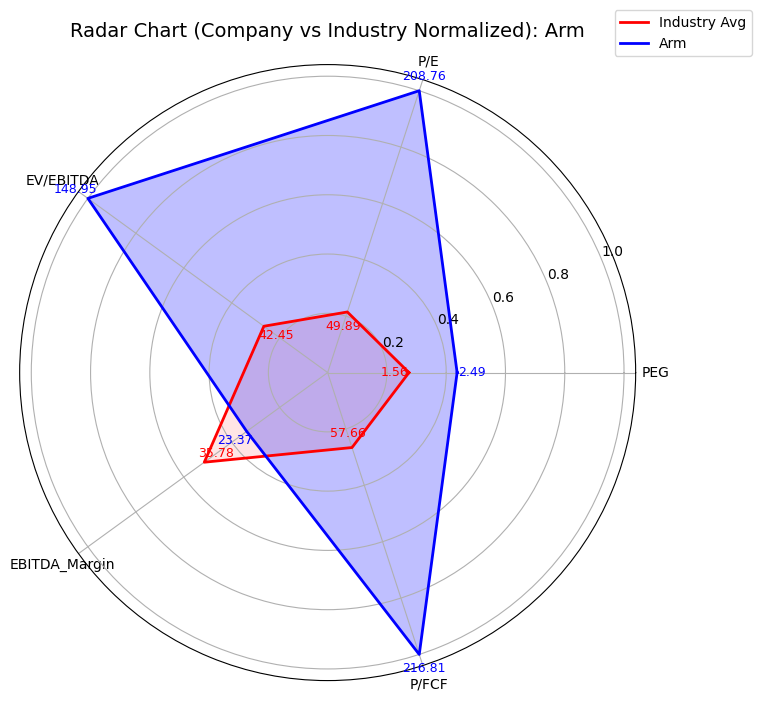

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# Step 1: Create dataset
# ----------------------------
data = {
    "Ticker": ["Arm", "QCOM", "Txn", "Mu", "Adi", "Amd", "Intc", "Mrvl", "Nxpi",
               "Mchp", "Mpwr", "Nvda", "Avgo", "tpe.2330", "tae.2254", "hkse.000660"],
    "PEG": [2.49, 1.80, 2.21, 0.13, 0, 0.77, 0.50, 1.52, 1.46, 5.7, 2.08, 1.73, 1.38, 1.18, 1.56, 0.51],
    "P/E": [208.76, 15.10, 37.65, 20.98, 12.34, 97.82, 88.08, 22.15, 28.21, 31.39, 21.92, 58.00, 107.38, 21.00, 21.14, 6.38],
    "EV/EBITDA": [148.95, 11.86, 24.64, 8.37, 5.61, 46.99, 123.21, 62.55, 16.74, 49.83, 55.32, 47.74, 47.67, 11.57, 14.27, 3.84],
    "EBITDA_Margin": [23.37, 31.66, 45.46, 46.81, 50.49, 18.21, -0.33, 16.20, 32.73, 21.22, 27.23, 59.42, 52.55, 69.86, 21.90, 55.76],
    "P/FCF": [216.81, 14.82, 125.68, 125.68, 5.87, 65.98, 0, 45.08, 30.52, 50.61, 57.31, 61.68, 62.17, 41.50, 14.65, 4.14]
}

df = pd.DataFrame(data)

# ----------------------------
# Step 2: Compute industry min, max, avg
# ----------------------------
metrics = df.columns[1:]
industry_avg = df[metrics].mean()
industry_min = df[metrics].min()
industry_max = df[metrics].max()

# ----------------------------
# Step 3: Normalize company values between industry min and max
# Industry average is normalized to 0.5
# ----------------------------
df_norm = df.copy()
for col in metrics:
    df_norm[col] = (df[col] - industry_min[col]) / (industry_max[col] - industry_min[col])

industry_avg_norm = (industry_avg - industry_min) / (industry_max - industry_min)

# ----------------------------
# Step 4: Radar Chart Function
# ----------------------------
def plot_radar(ticker):
    categories = list(metrics)
    N = len(categories)

    # Company data (normalized + raw)
    company_data_norm = df_norm[df_norm["Ticker"] == ticker][metrics].values.flatten().tolist()
    company_data_raw = df[df["Ticker"] == ticker][metrics].values.flatten().tolist()

    # Industry normalized
    industry_data_norm = industry_avg_norm.values.flatten().tolist()
    industry_data_raw = industry_avg.values.flatten().tolist()

    # Close the radar chart (make circular)
    company_data_norm += company_data_norm[:1]
    industry_data_norm += industry_data_norm[:1]
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))

    # Plot industry avg (RED)
    ax.plot(angles, industry_data_norm, linewidth=2, linestyle="solid", color="red", label="Industry Avg")
    ax.fill(angles, industry_data_norm, color="red", alpha=0.1)

    # Plot company (BLUE)
    ax.plot(angles, company_data_norm, linewidth=2, linestyle="solid", color="blue", label=ticker)
    ax.fill(angles, company_data_norm, color="blue", alpha=0.25)

    # Labels for categories
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Print actual values on edges
    for i, angle in enumerate(angles[:-1]):
        ax.text(angle, company_data_norm[i] + 0.05, f"{company_data_raw[i]:.2f}",
                ha="center", va="center", fontsize=9, color="blue")
        ax.text(angle, industry_data_norm[i] - 0.05, f"{industry_data_raw[i]:.2f}",
                ha="center", va="center", fontsize=9, color="red")

    ax.set_title(f"Radar Chart (Company vs Industry Normalized): {ticker}", size=14, pad=20)
    ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))

    plt.show()

# ----------------------------
# Step 5: Example Usage
# ----------------------------
plot_radar("Arm")


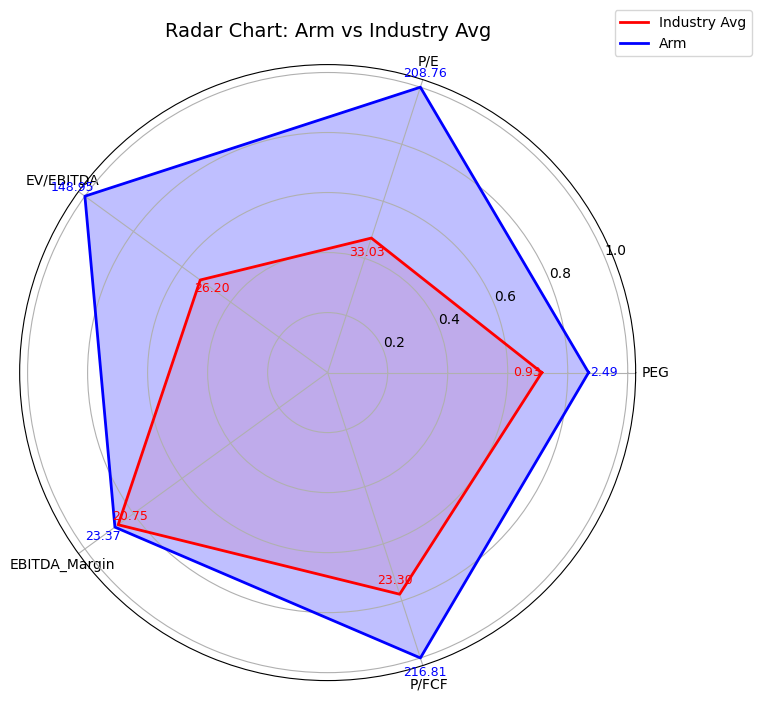

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# Step 1: Create dataset
# ----------------------------
data = {
    "Ticker": ["Arm", "QCOM", "Txn", "Mu", "Adi", "Amd", "Intc", "Mrvl", "Nxpi",
               "Mchp", "Mpwr", "Nvda", "Avgo", "tpe.2330", "tae.2254", "hkse.000660"],
    "PEG": [2.49, 1.80, 2.21, 0.13, 0, 0.77, 0.50, 1.52, 1.46, 5.7, 2.08, 1.73, 1.38, 1.18, 1.56, 0.51],
    "P/E": [208.76, 15.10, 37.65, 20.98, 12.34, 97.82, 88.08, 22.15, 28.21, 31.39, 21.92, 58.00, 107.38, 21.00, 21.14, 6.38],
    "EV/EBITDA": [148.95, 11.86, 24.64, 8.37, 5.61, 46.99, 123.21, 62.55, 16.74, 49.83, 55.32, 47.74, 47.67, 11.57, 14.27, 3.84],
    "EBITDA_Margin": [23.37, 31.66, 45.46, 46.81, 50.49, 18.21, 0.01, 16.20, 32.73, 21.22, 27.23, 59.42, 52.55, 69.86, 21.90, 55.76],
    "P/FCF": [216.81, 14.82, 125.68, 125.68, 5.87, 65.98, 0.01, 45.08, 30.52, 50.61, 57.31, 61.68, 62.17, 41.50, 14.65, 4.14]
}

df = pd.DataFrame(data)

# ----------------------------
# Step 2: Replace zero or negative values for log
# ----------------------------
for col in df.columns[1:]:
    df[col] = df[col].replace(0, 0.01)  # small positive value to avoid log(0)
    df[col] = df[col].apply(lambda x: max(x, 0.01))  # ensure no negative

# ----------------------------
# Step 3: Compute log values
# ----------------------------
df_log = df.copy()
metrics = df.columns[1:]

# Logarithmic scaling (base 10)
for col in metrics:
    df_log[col] = np.log10(df[col])

# Industry average (log)
industry_avg_log = df_log[metrics].mean()

# Industry min & max (log)
industry_min_log = df_log[metrics].min()
industry_max_log = df_log[metrics].max()

# Normalize log values between min and max (industry min-max)
df_norm_log = df_log.copy()
for col in metrics:
    df_norm_log[col] = (df_log[col] - industry_min_log[col]) / (industry_max_log[col] - industry_min_log[col])

industry_avg_norm_log = (industry_avg_log - industry_min_log) / (industry_max_log - industry_min_log)

# ----------------------------
# Step 4: Radar Chart Function (log normalized)
# ----------------------------
def plot_radar_log(ticker):
    categories = list(metrics)
    N = len(categories)

    # Company data (normalized + raw)
    company_data_norm = df_norm_log[df_norm_log["Ticker"] == ticker][metrics].values.flatten().tolist()
    company_data_raw = df[df["Ticker"] == ticker][metrics].values.flatten().tolist()

    # Industry normalized
    industry_data_norm = industry_avg_norm_log.values.flatten().tolist()
    industry_data_raw = industry_avg_log.values.flatten().tolist()

    # Close the radar chart (make circular)
    company_data_norm += company_data_norm[:1]
    industry_data_norm += industry_data_norm[:1]
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))

    # Plot industry avg (RED)
    ax.plot(angles, industry_data_norm, linewidth=2, linestyle="solid", color="red", label="Industry Avg")
    ax.fill(angles, industry_data_norm, color="red", alpha=0.1)

    # Plot company (BLUE)
    ax.plot(angles, company_data_norm, linewidth=2, linestyle="solid", color="blue", label=ticker)
    ax.fill(angles, company_data_norm, color="blue", alpha=0.25)

    # Labels for categories
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Print actual raw values (log scale optional)
    for i, angle in enumerate(angles[:-1]):
        ax.text(angle, company_data_norm[i] + 0.05, f"{company_data_raw[i]:.2f}",
                ha="center", va="center", fontsize=9, color="blue")
        ax.text(angle, industry_data_norm[i] - 0.05, f"{10**industry_data_raw[i]:.2f}",
                ha="center", va="center", fontsize=9, color="red")

    ax.set_title(f"Radar Chart: {ticker} vs Industry Avg", size=14, pad=20)
    ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))

    plt.show()

# ----------------------------
# Step 5: Example Usage
# ----------------------------
plot_radar_log("Arm")
